Looking at /gpfs/gibbs/project/david_moore/ab2935/Data/20220811/Fine_Binned_Vpp/3.0Vpp/0.5kHz/mca_keith*
 [05:42:39PM - __init__]:  1 files of MCA data loaded for 30.00 OV 
MCA data -> peaks: 6, bins: 9


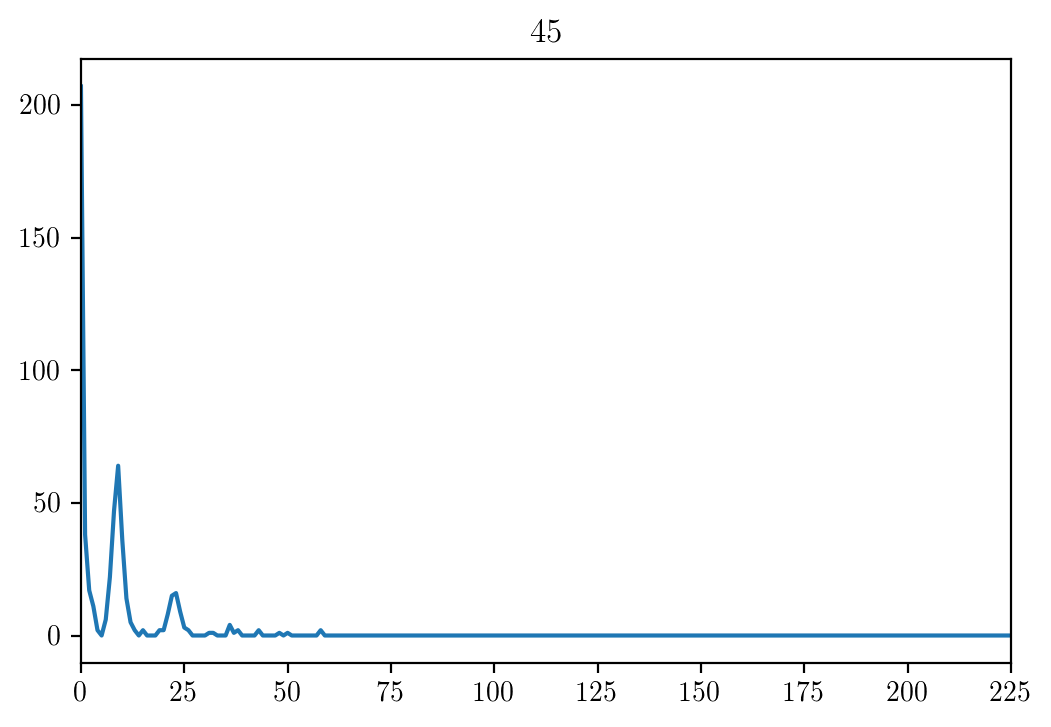

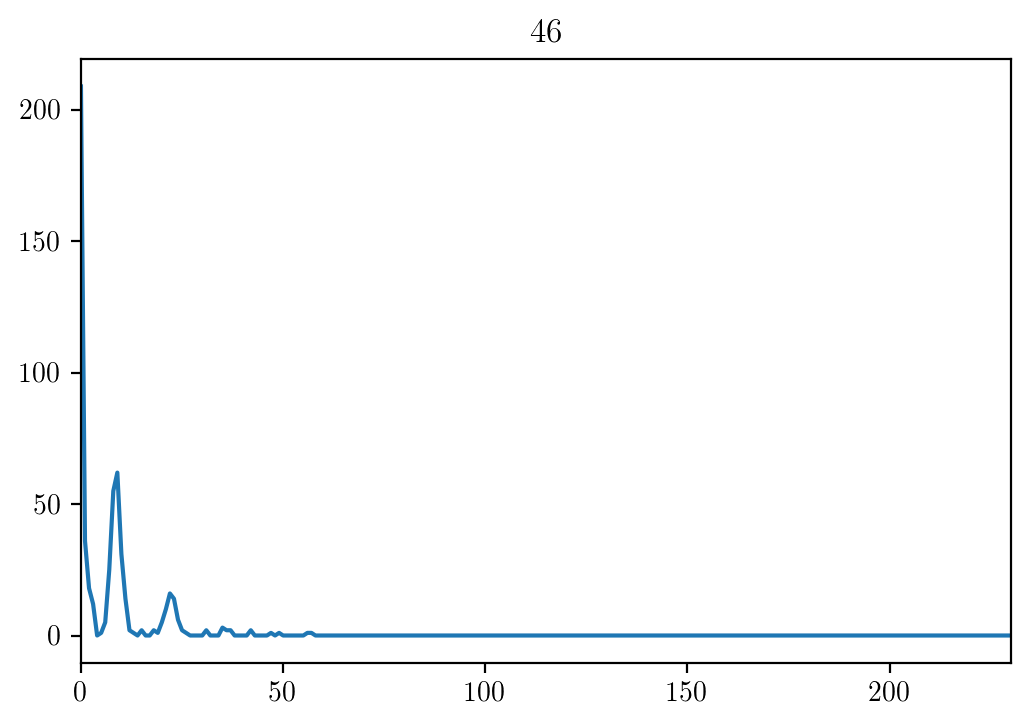

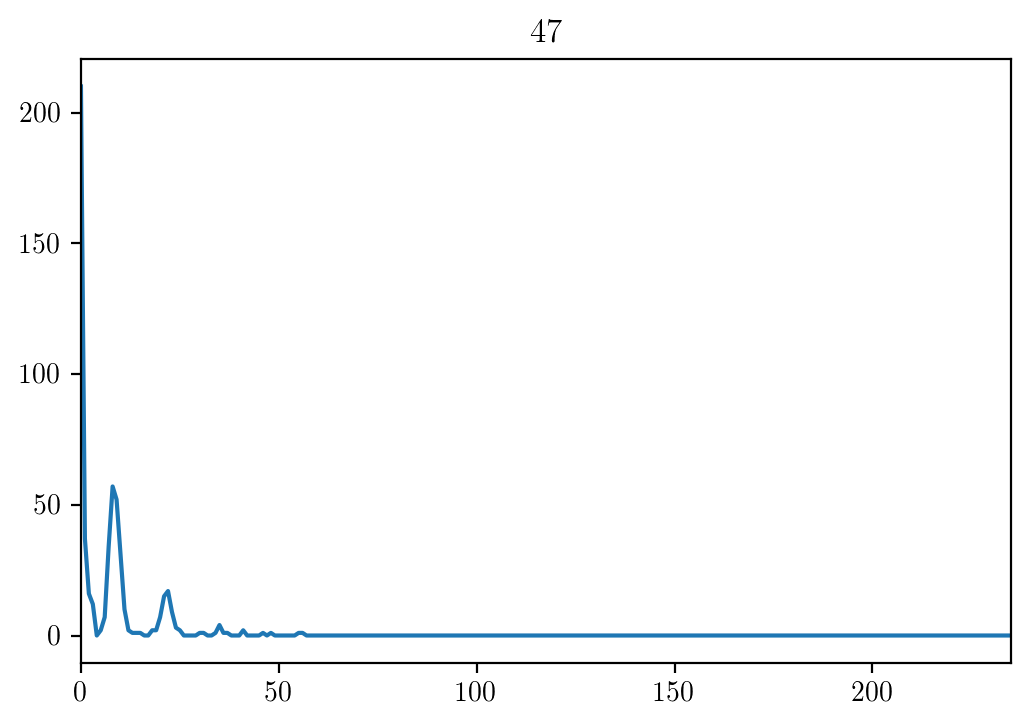

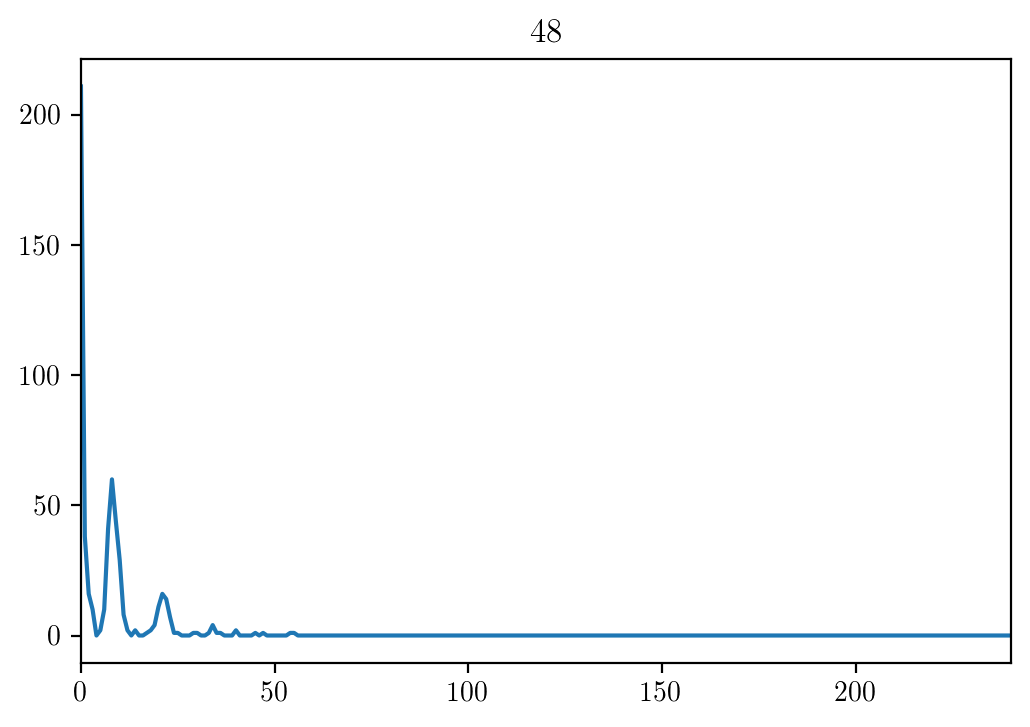

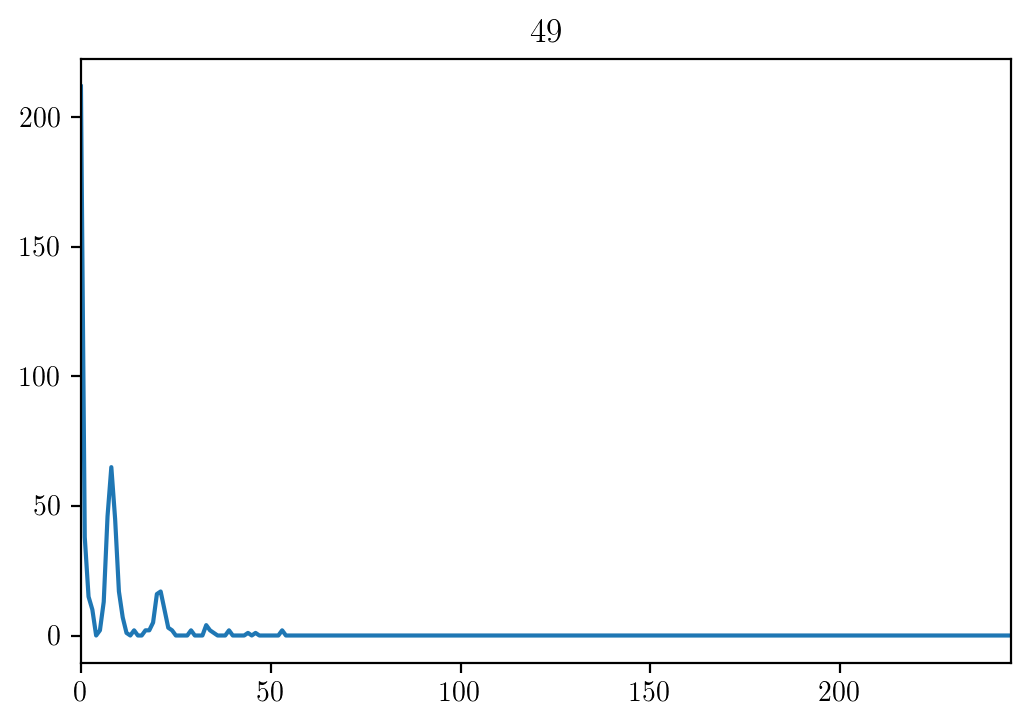

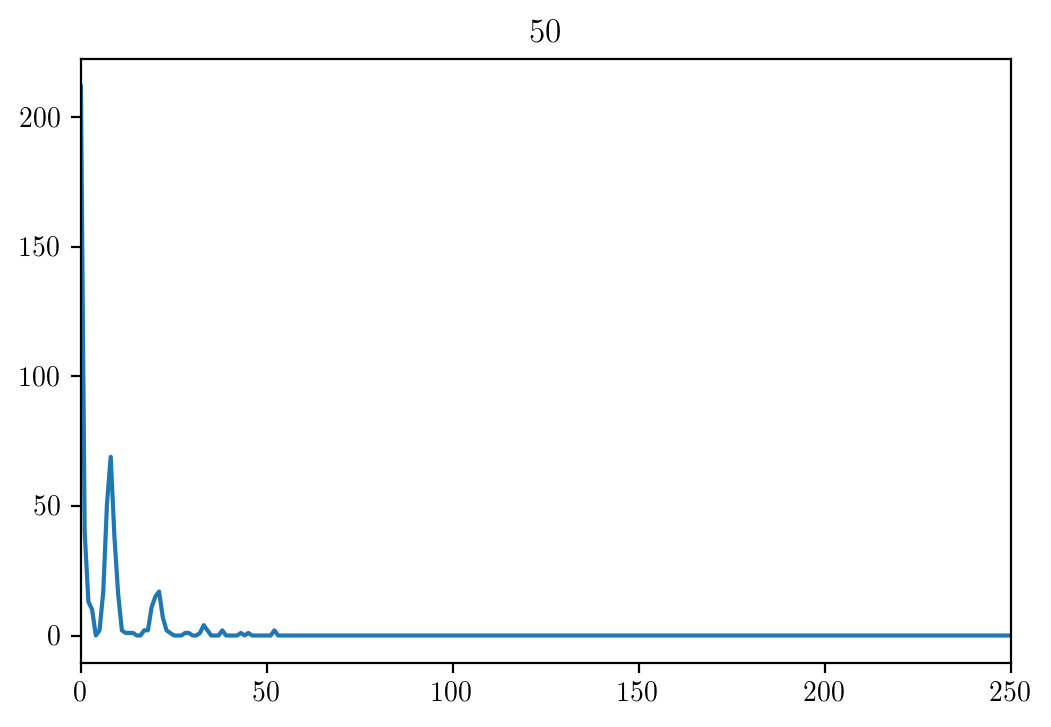

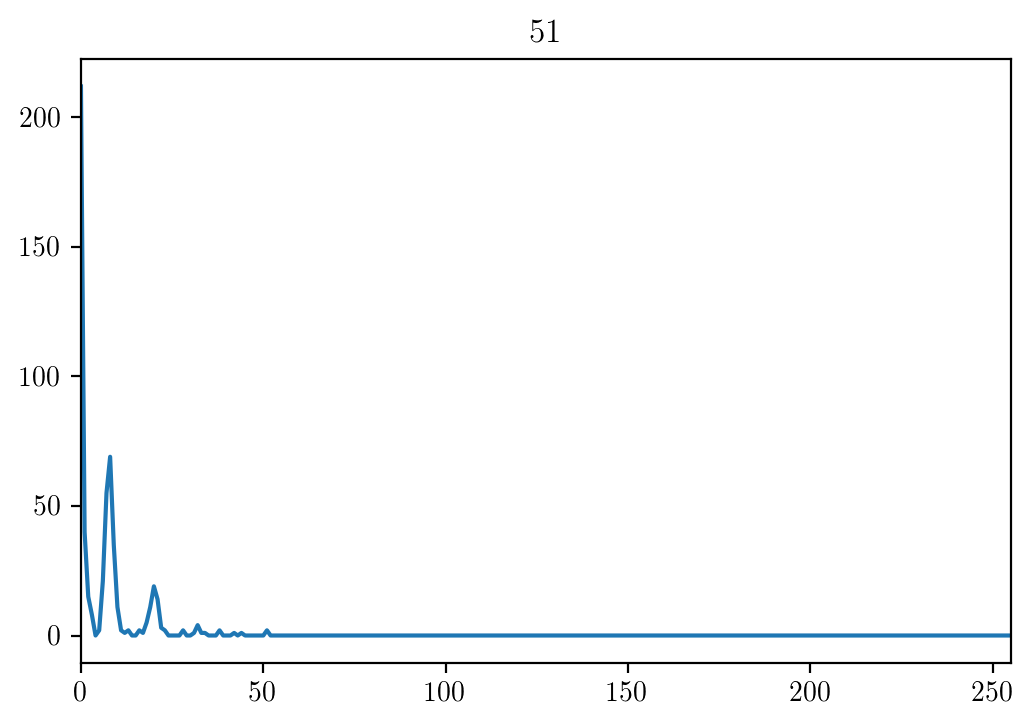

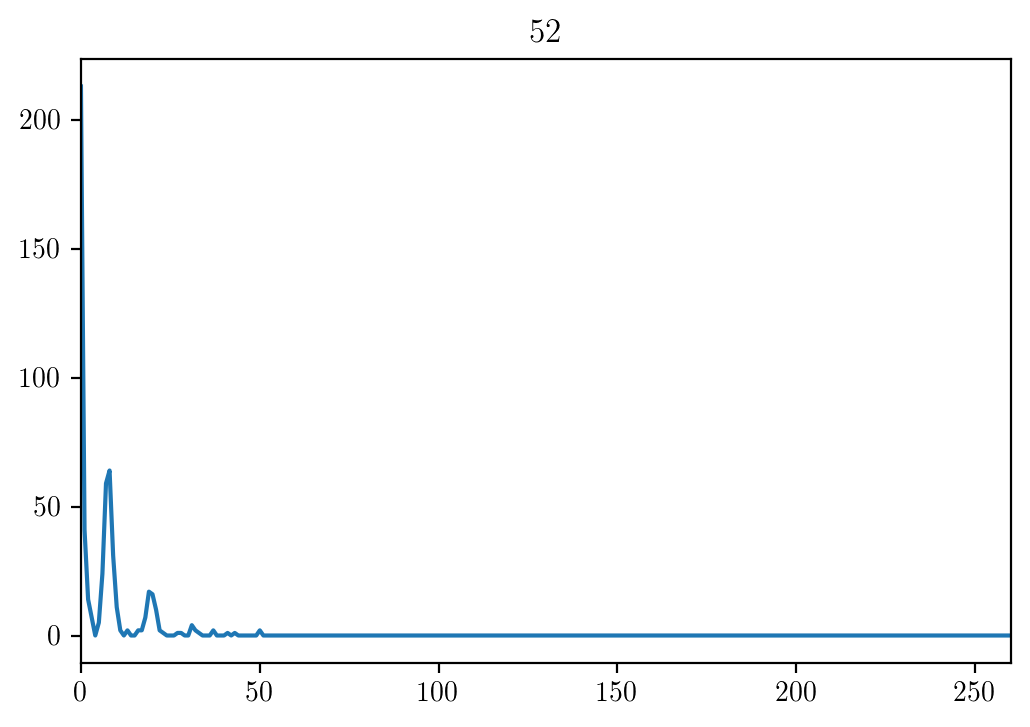

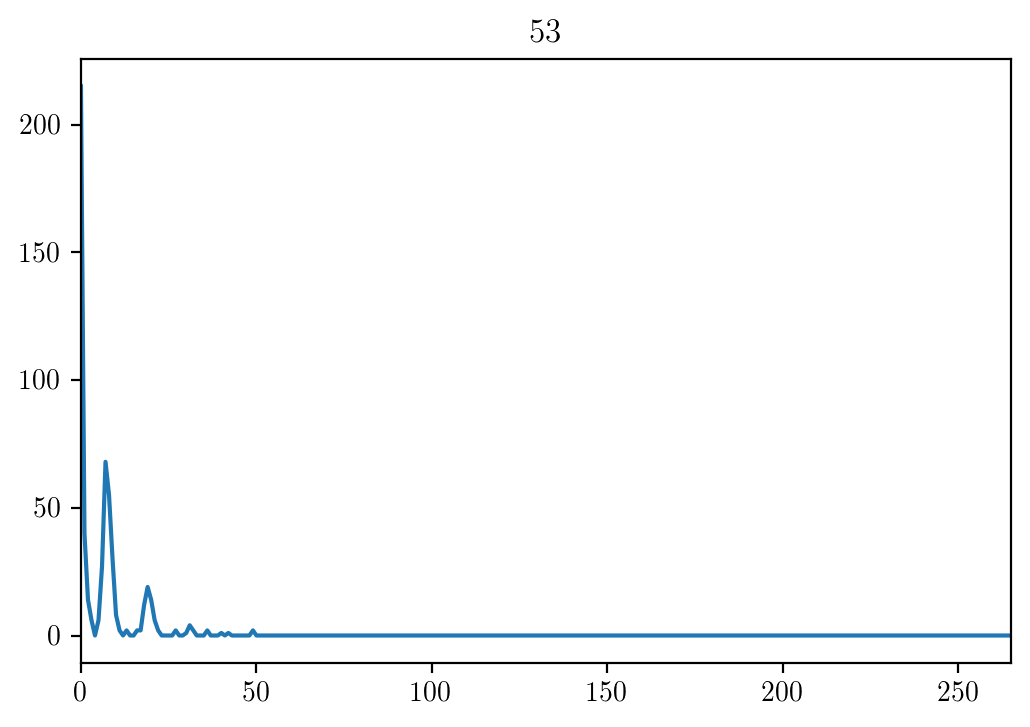

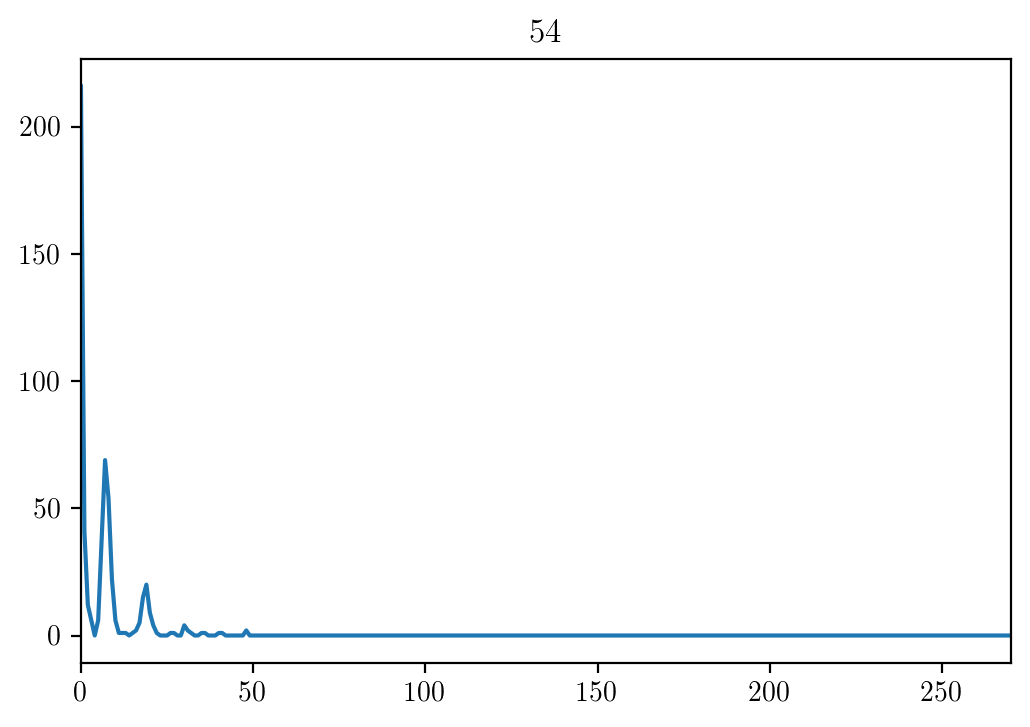

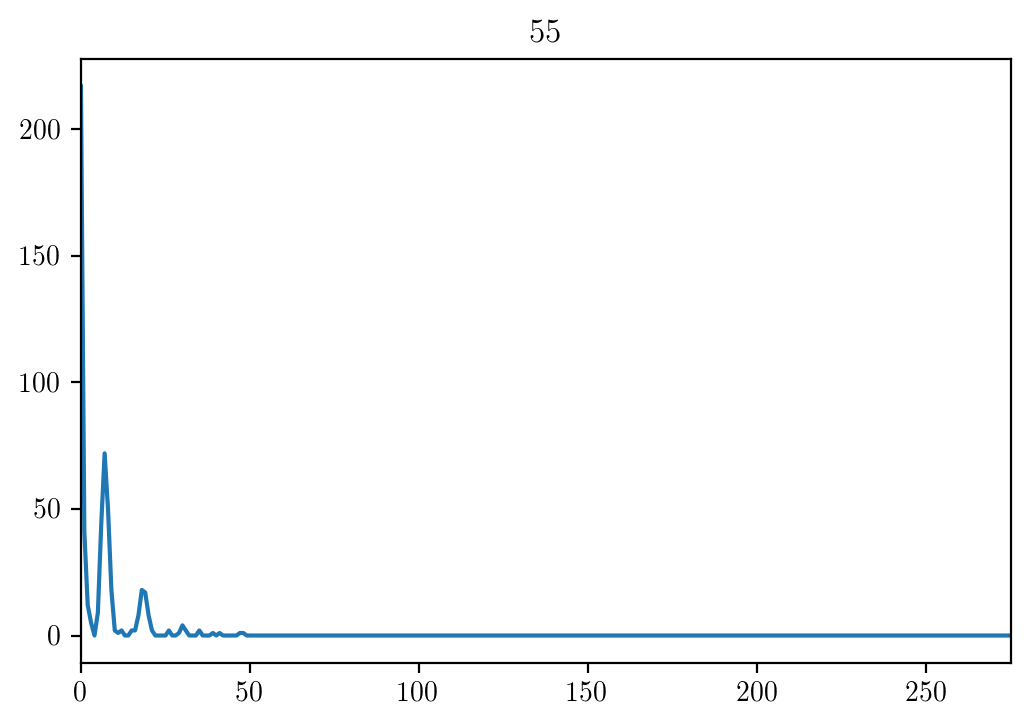

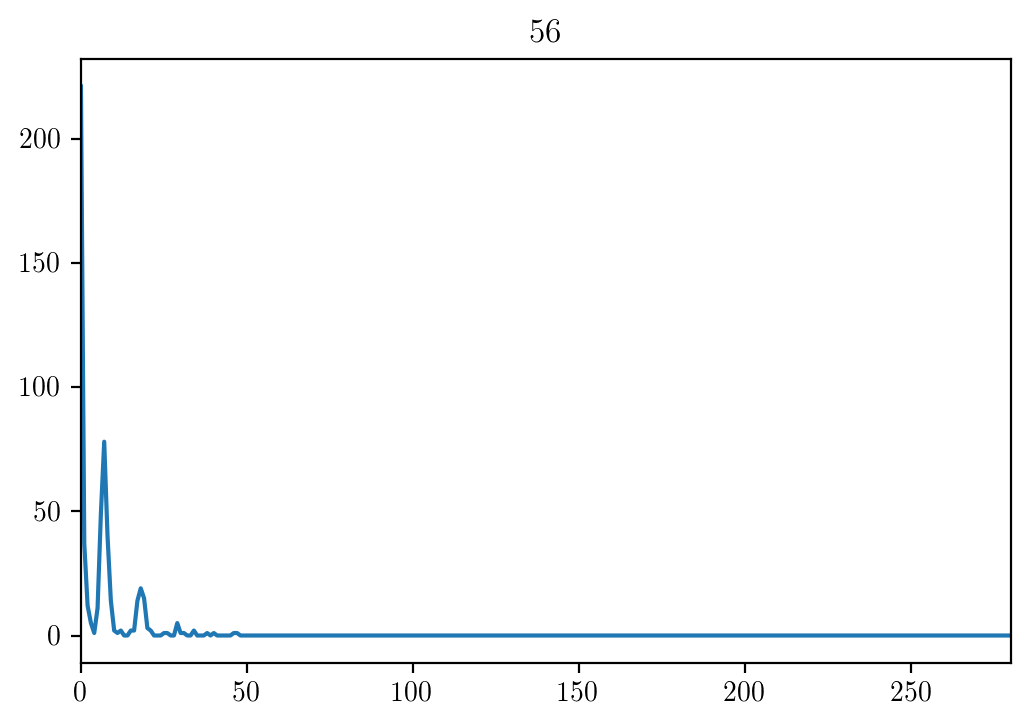

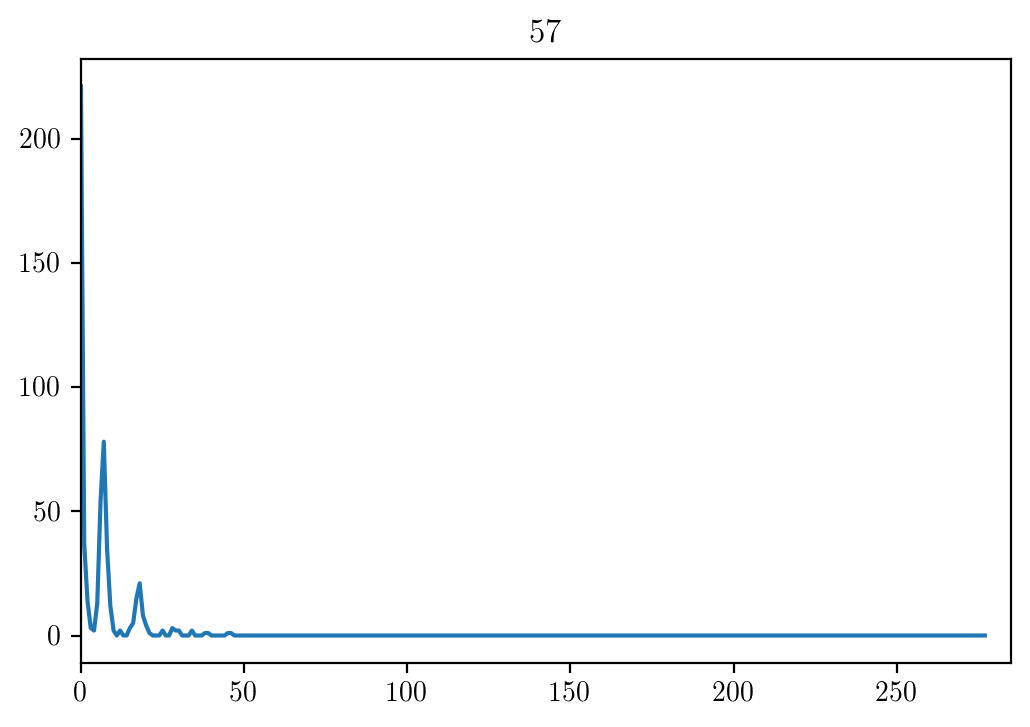

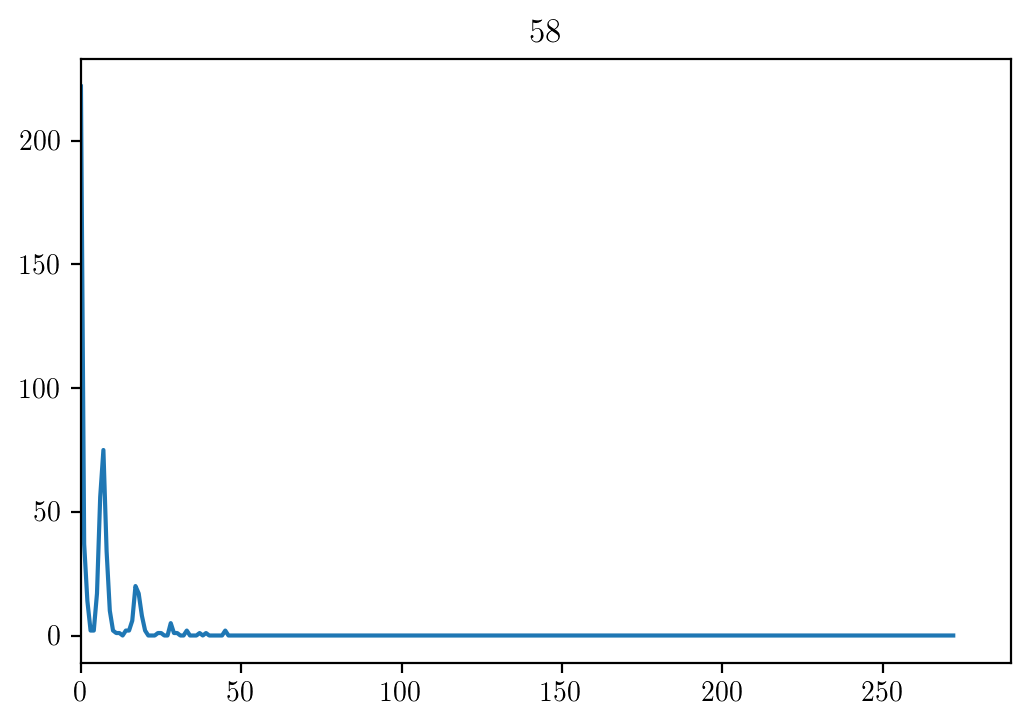

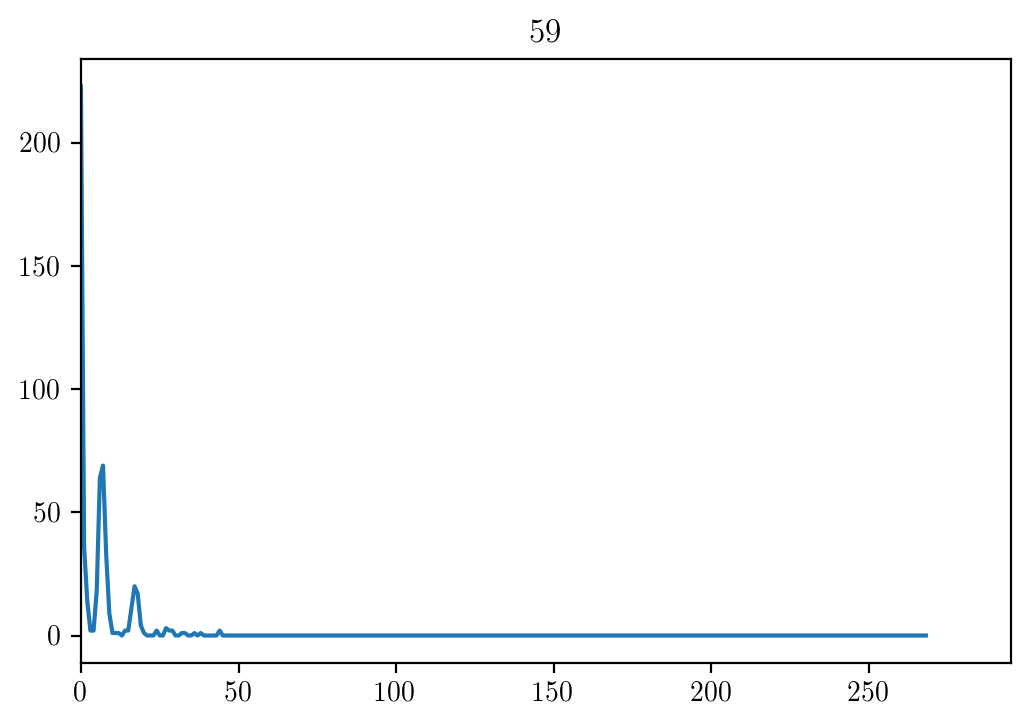

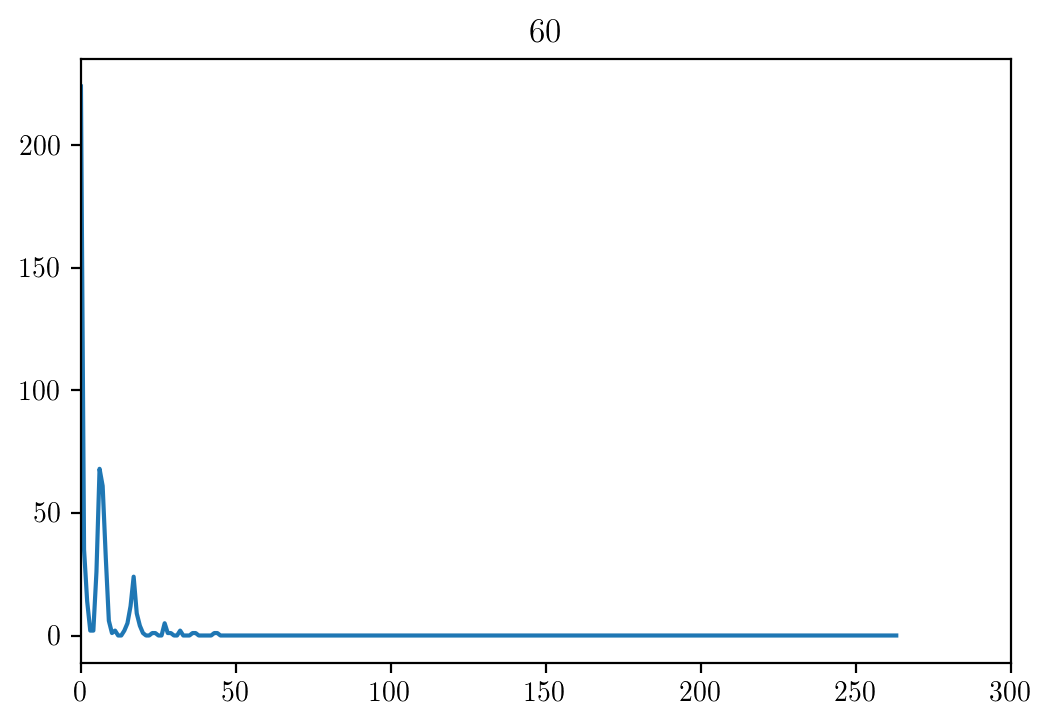

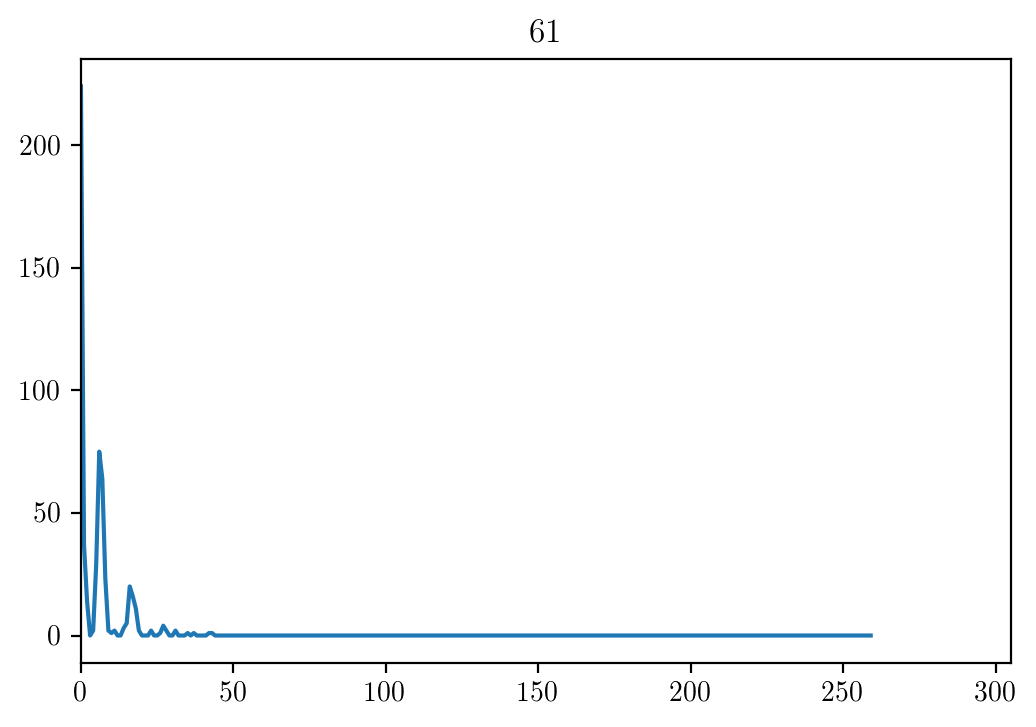

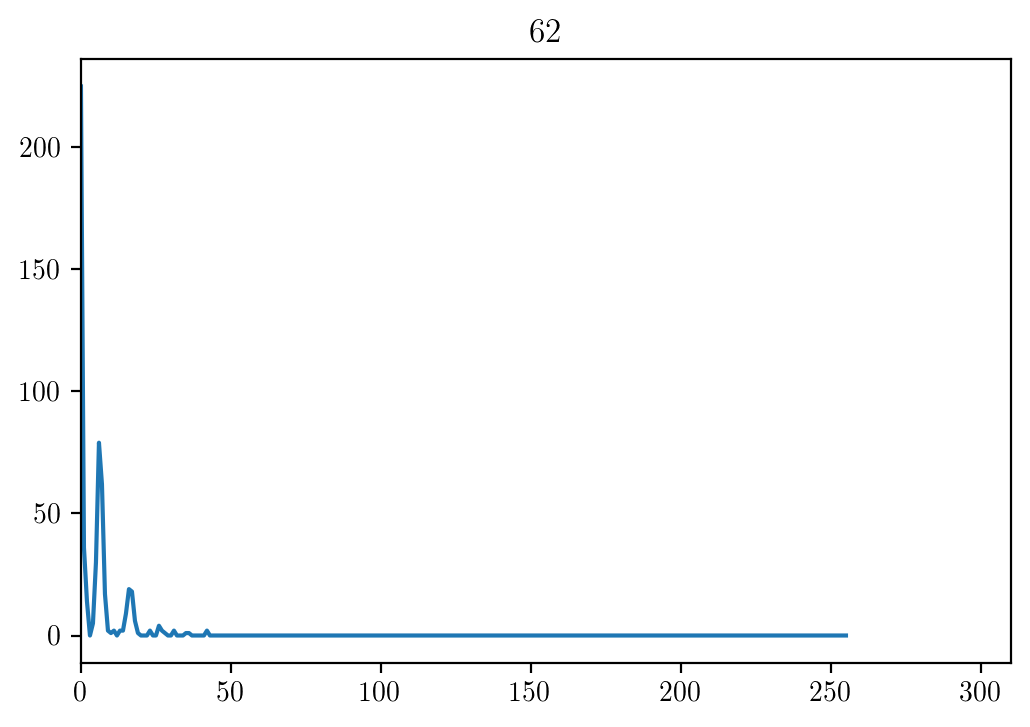

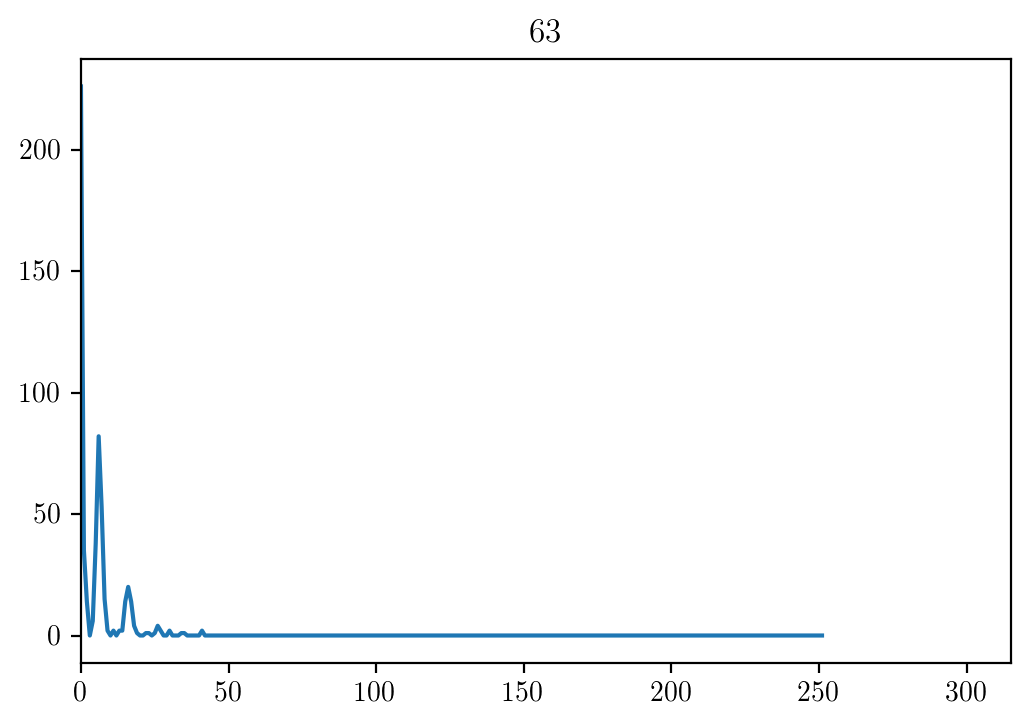

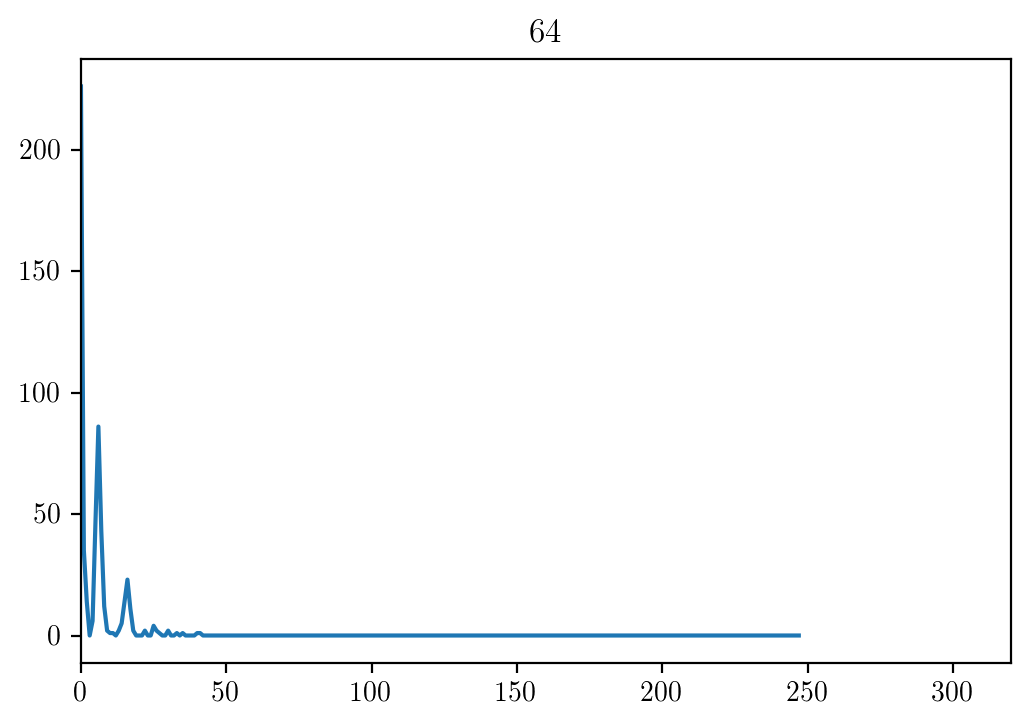

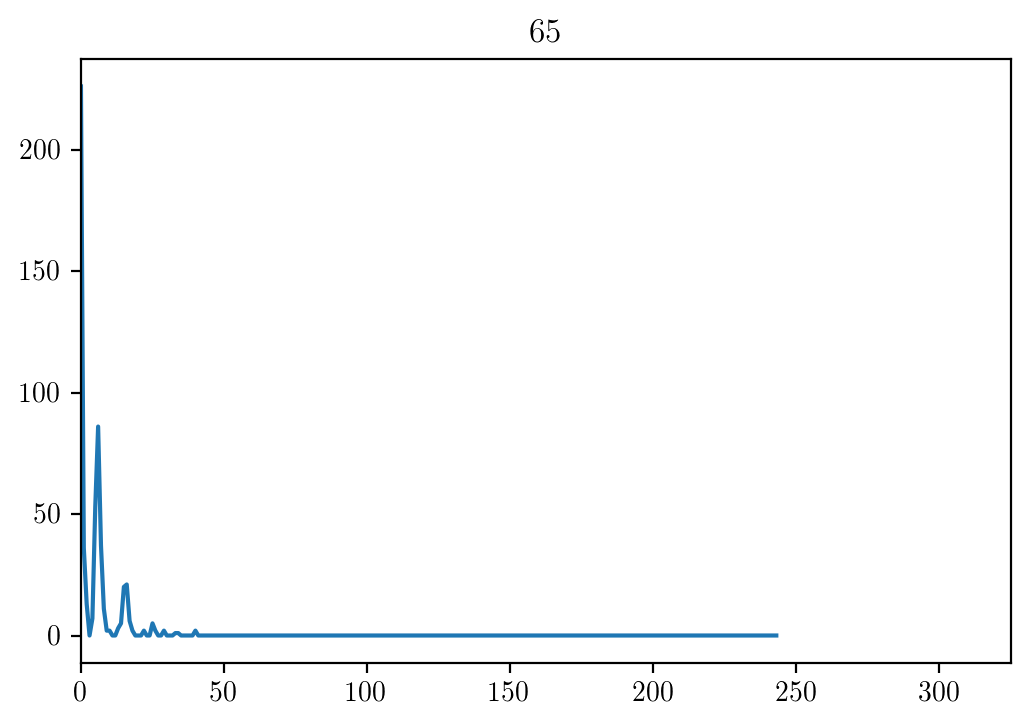

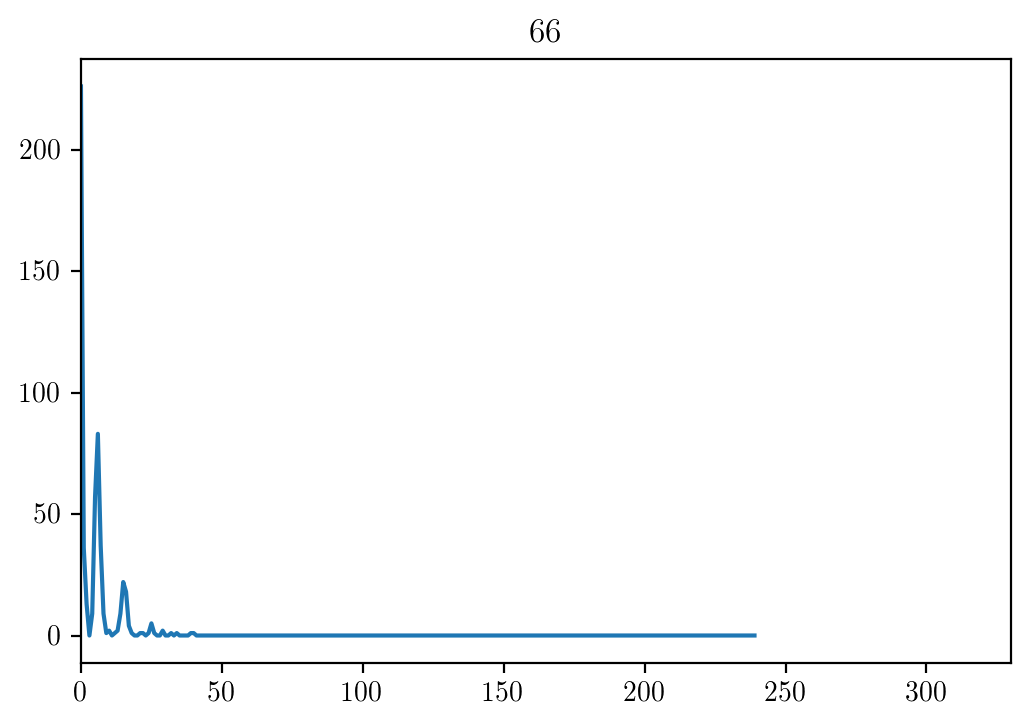

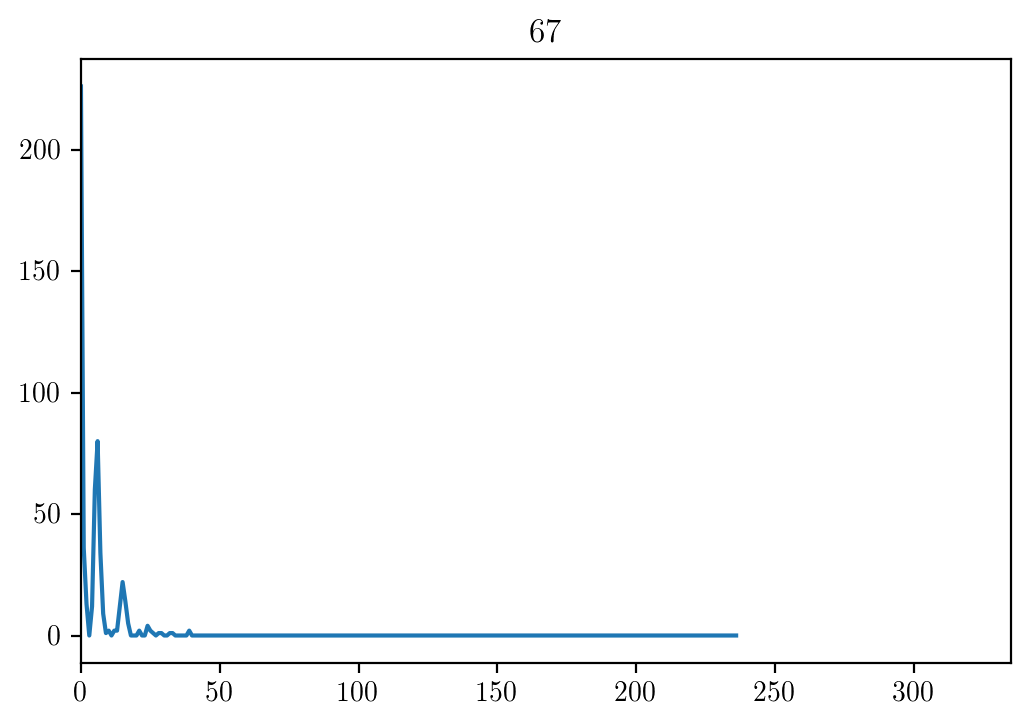

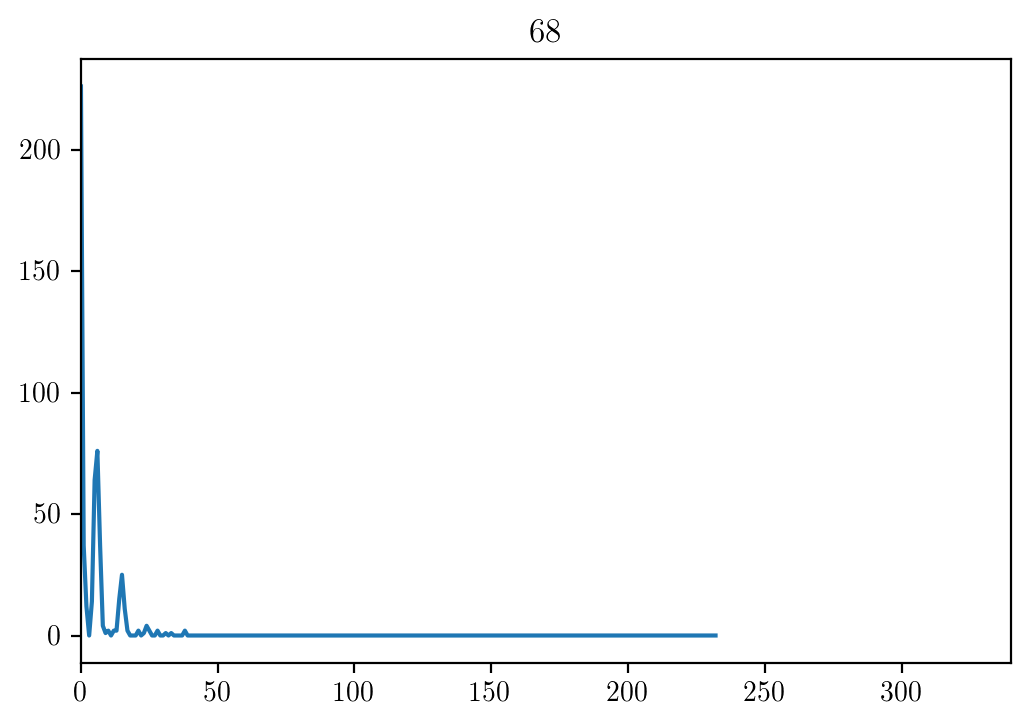

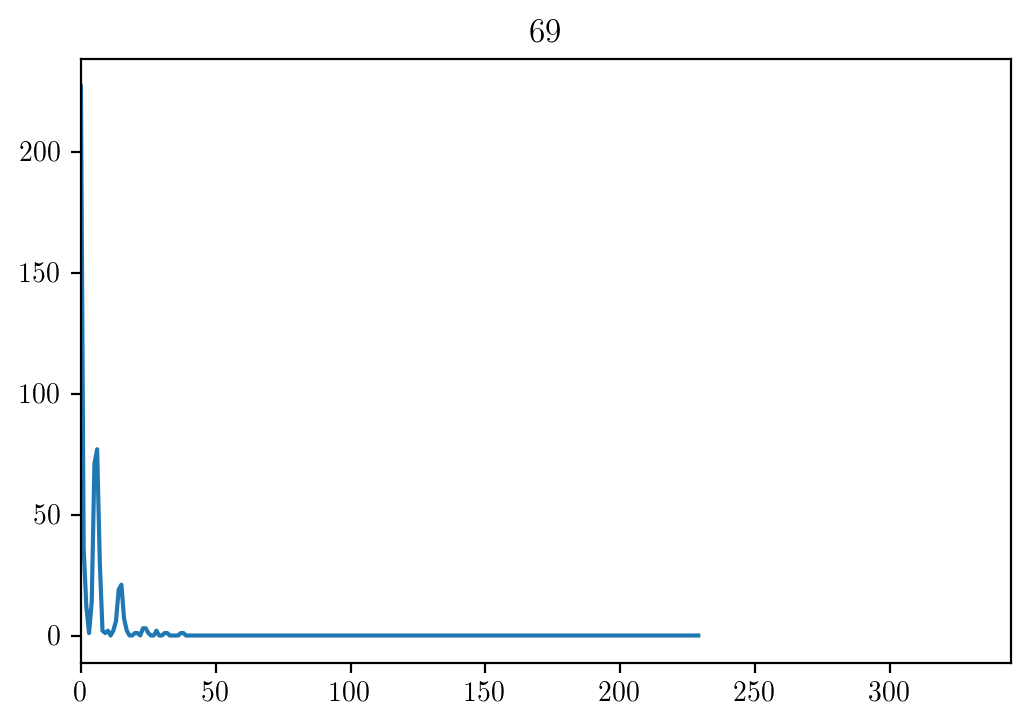

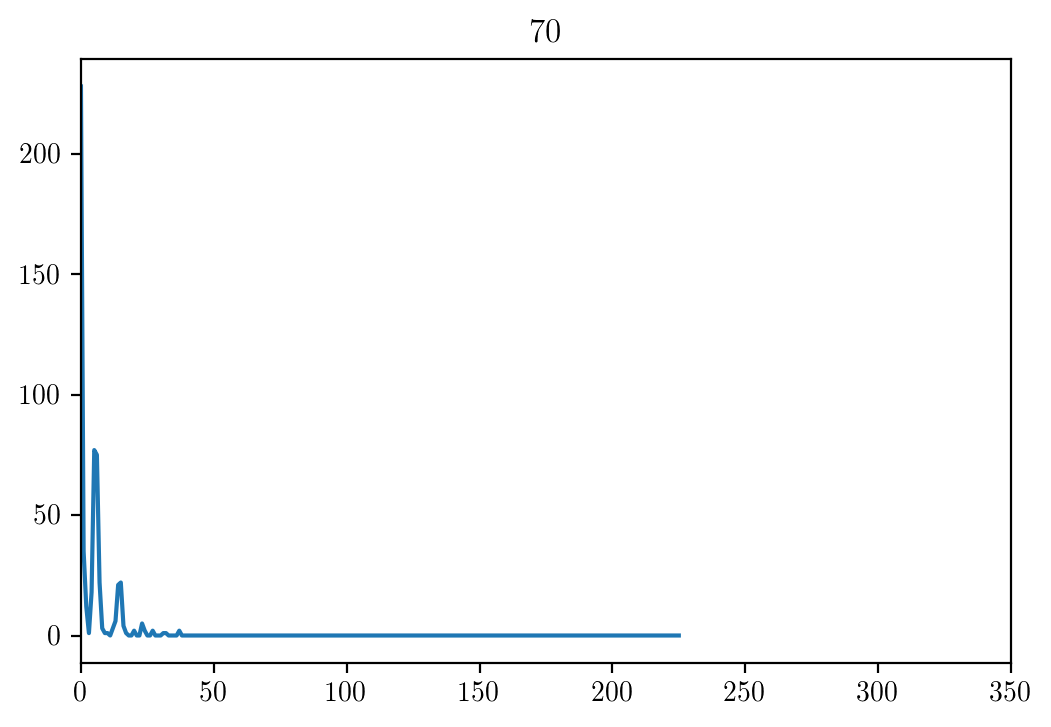

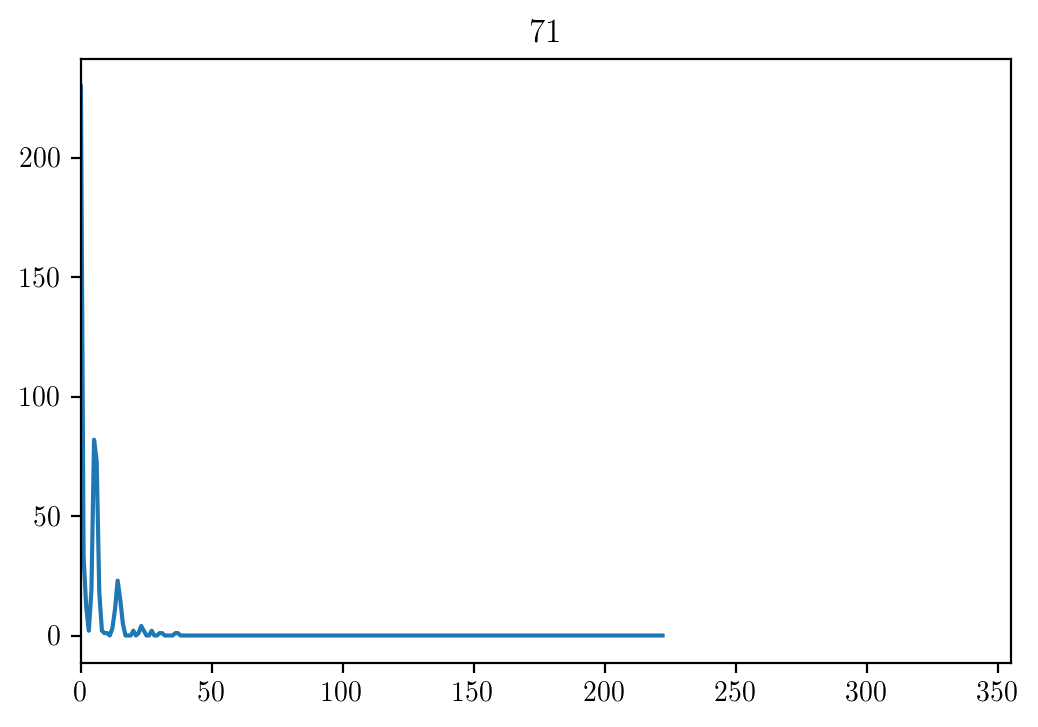

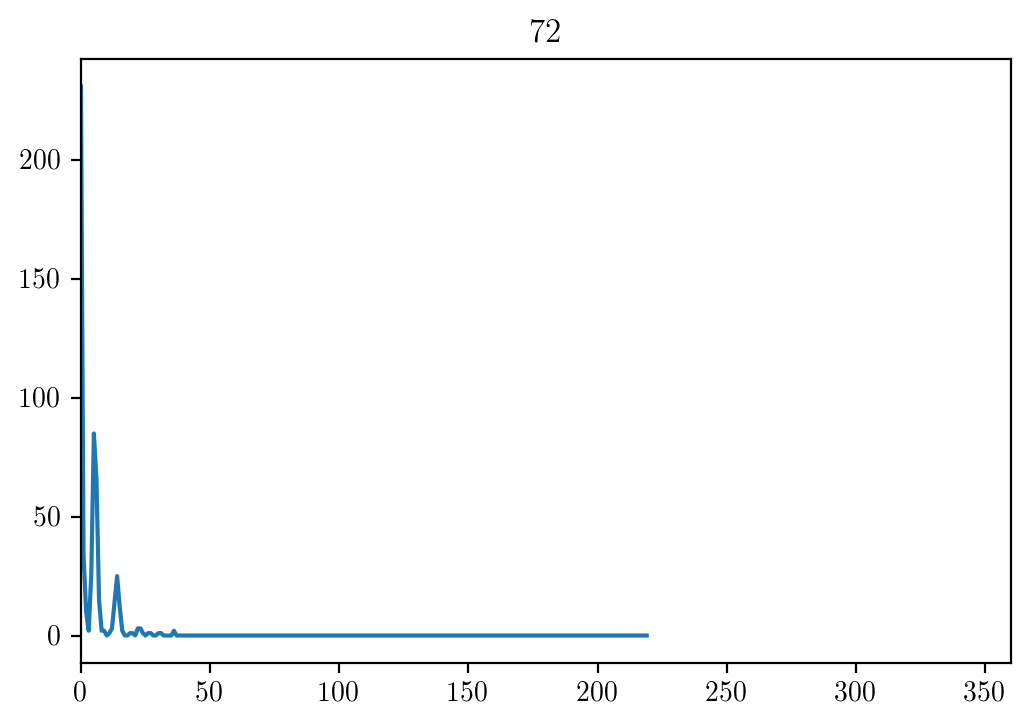

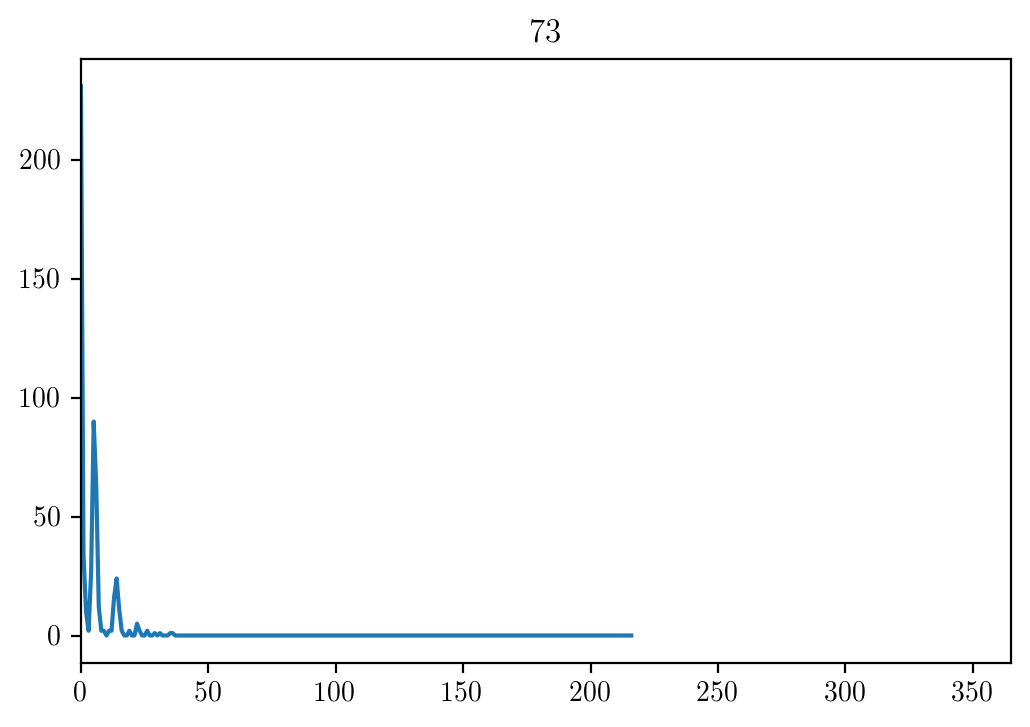

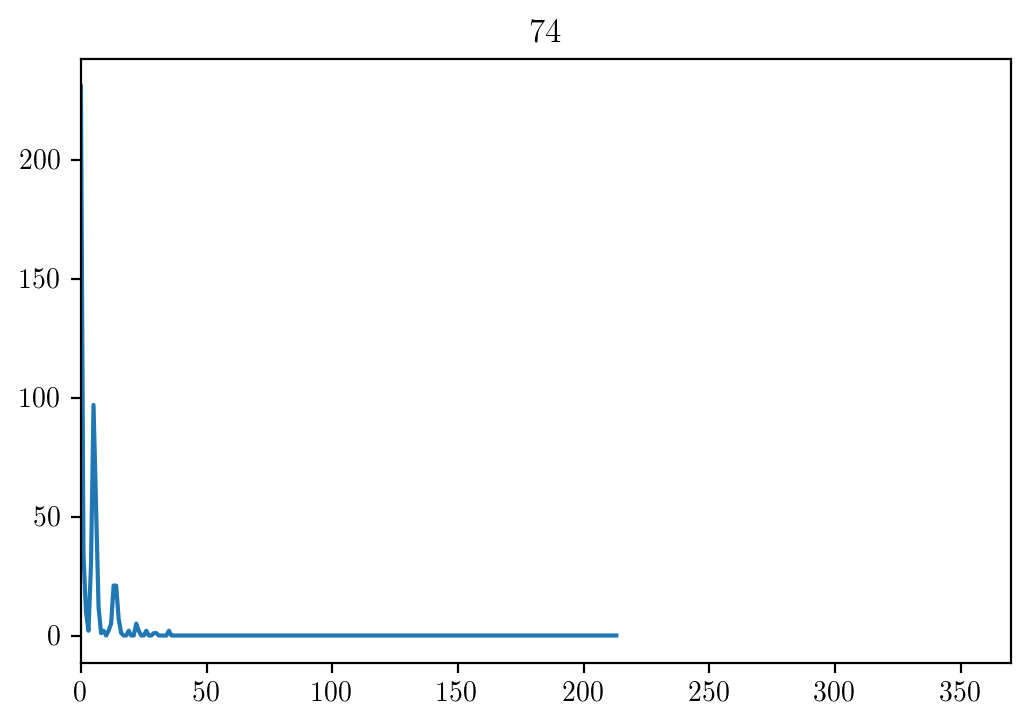

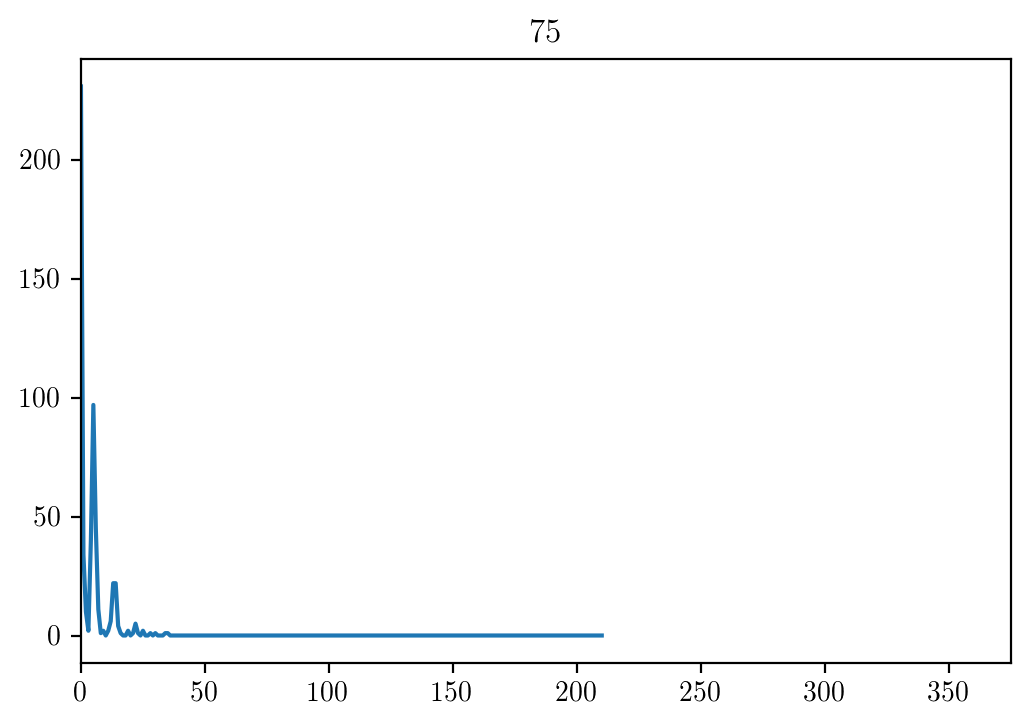

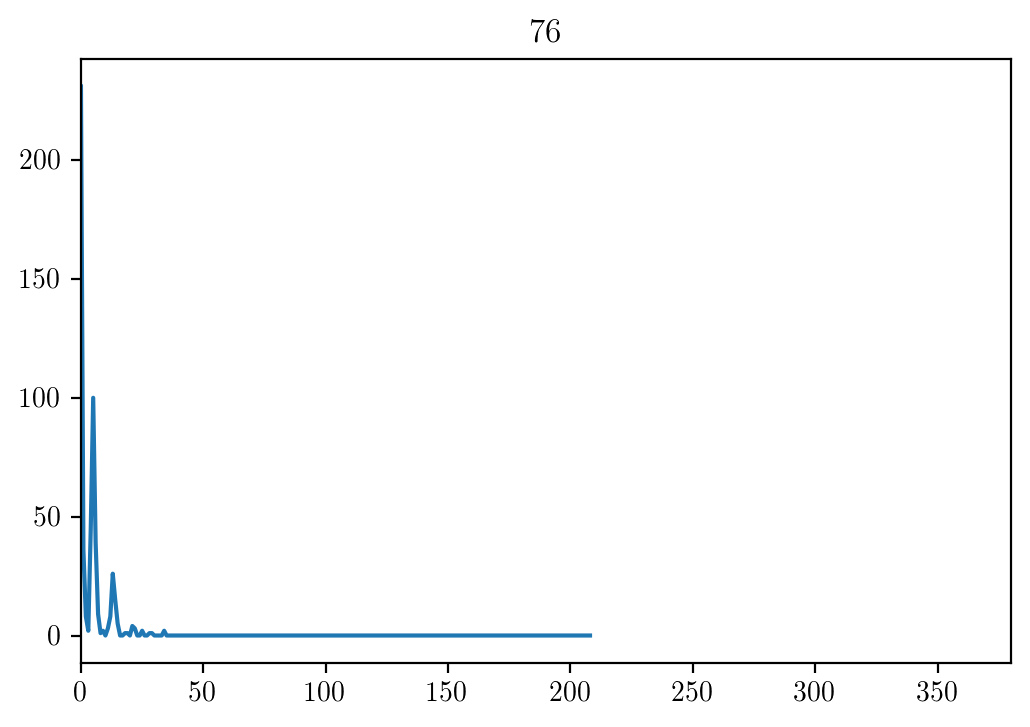

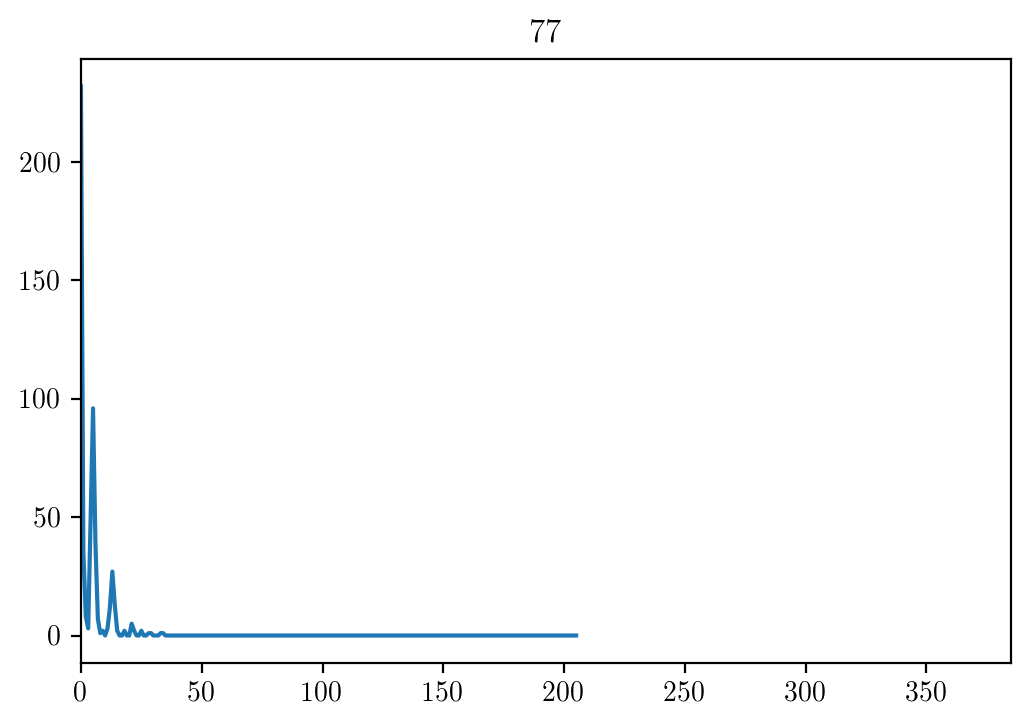

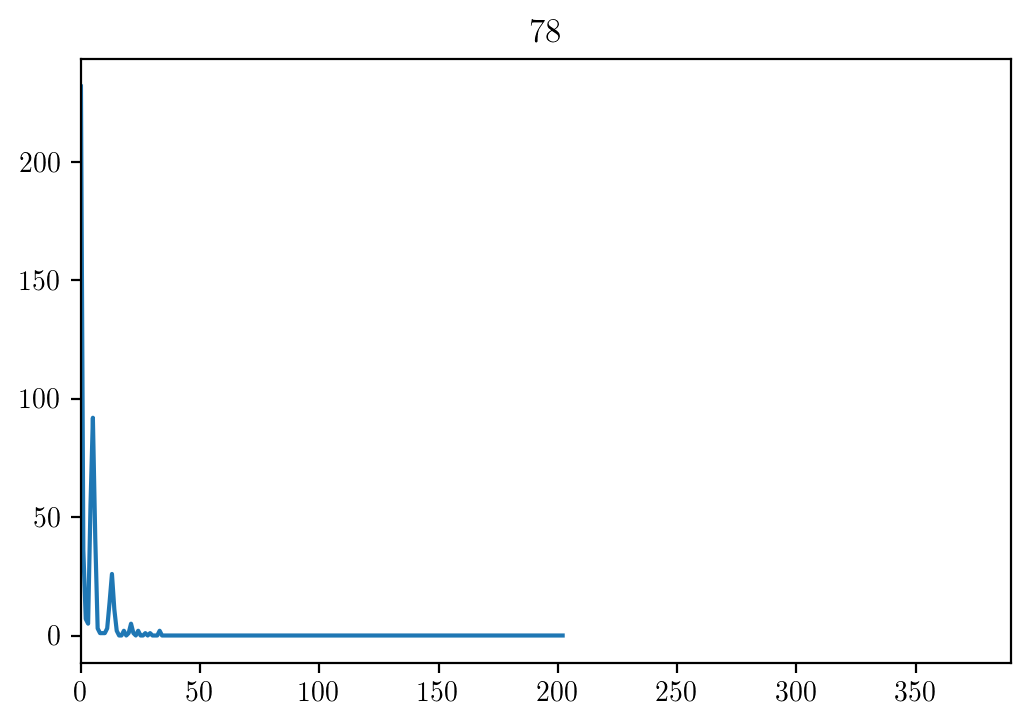

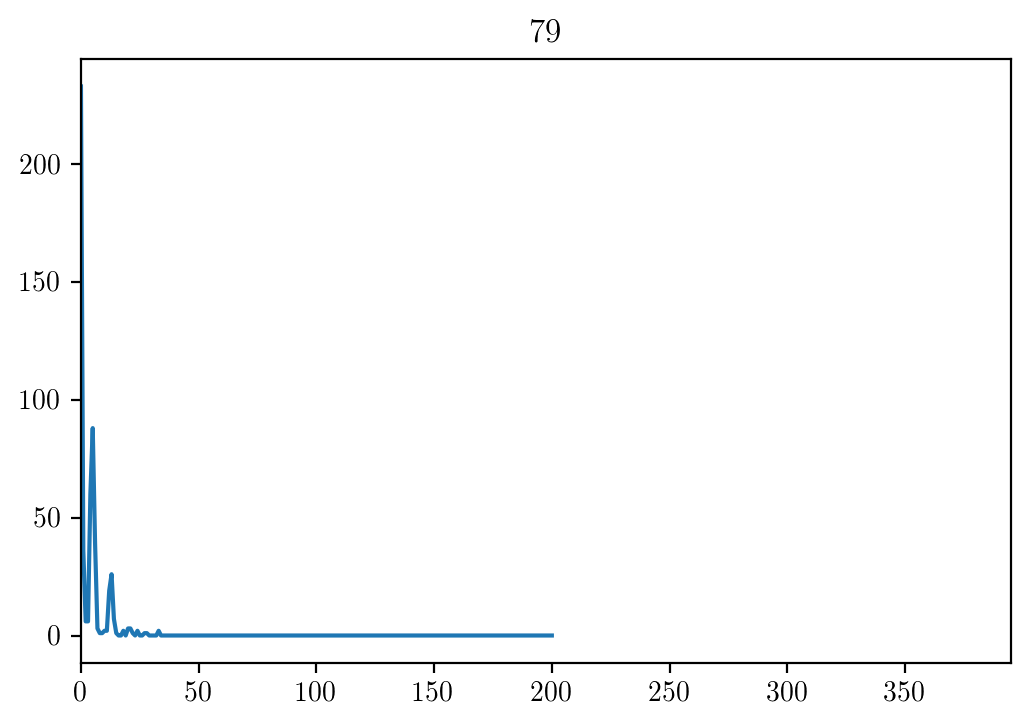

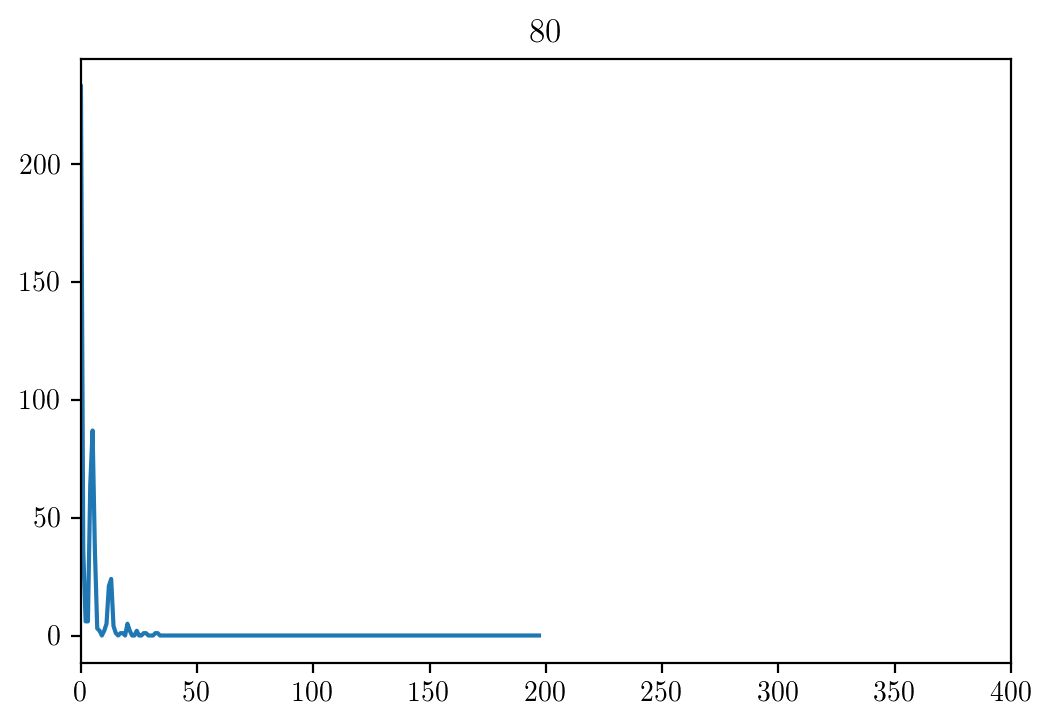

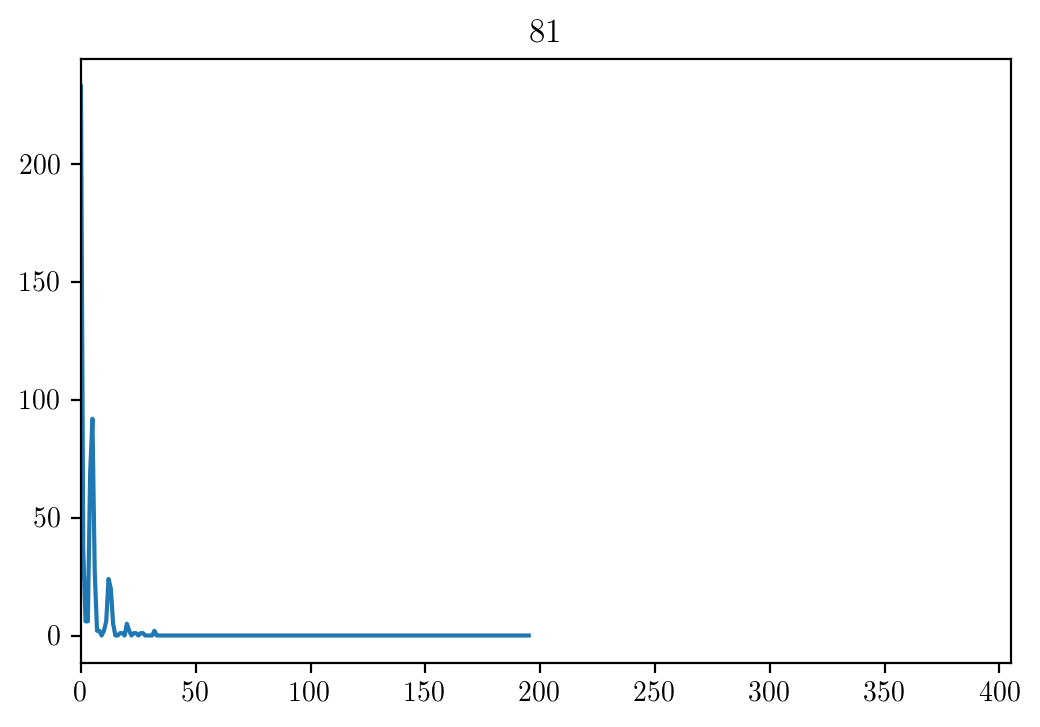

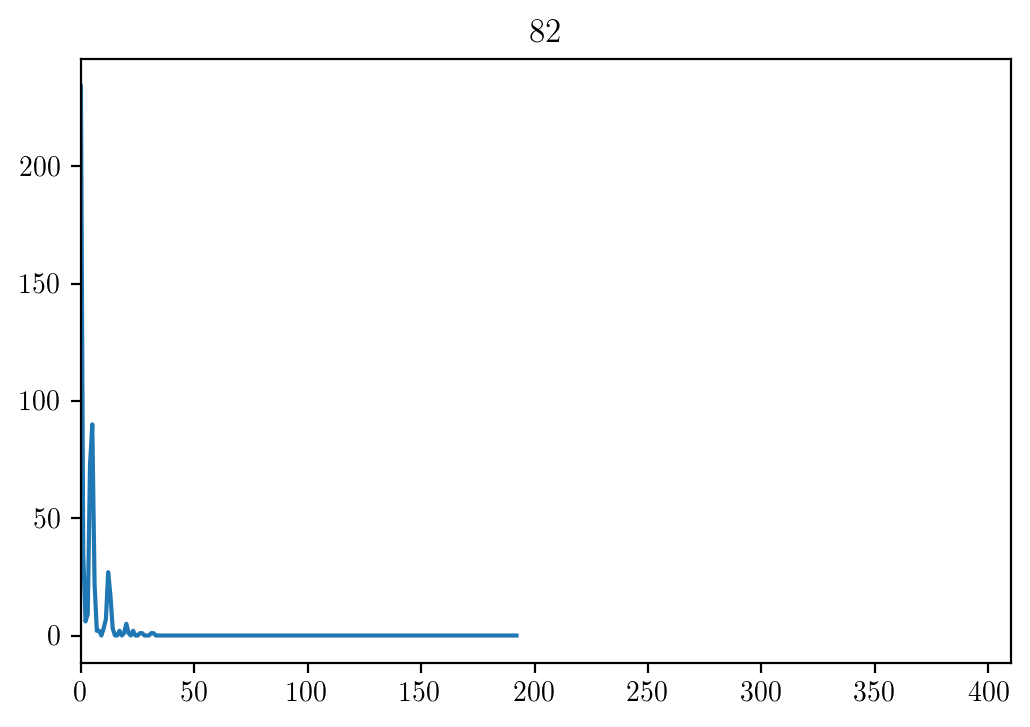

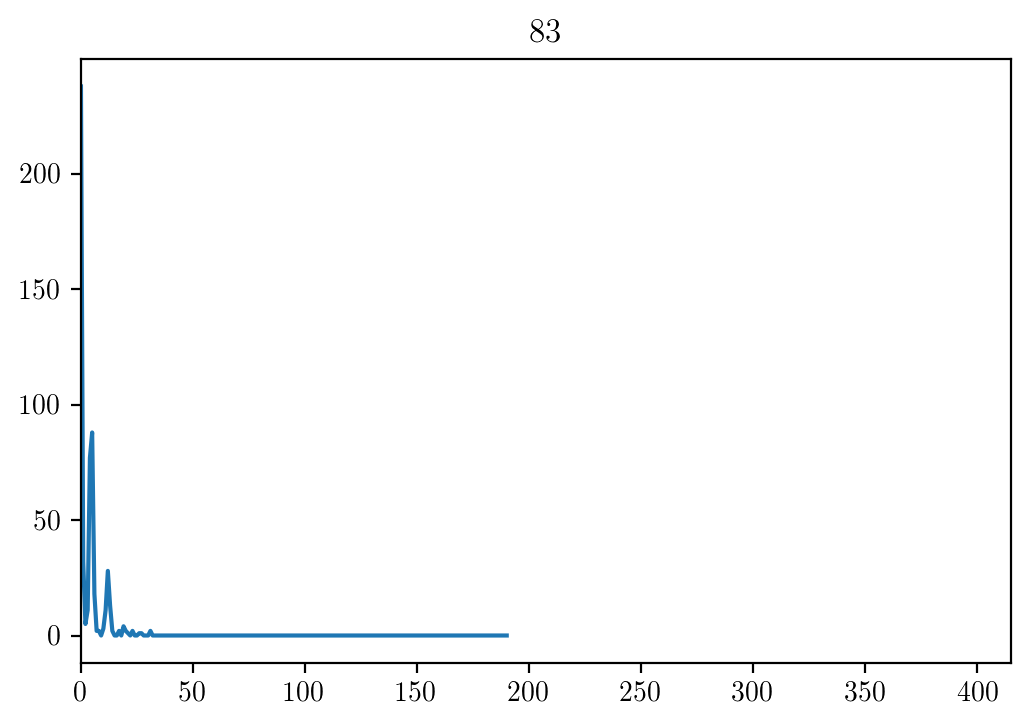

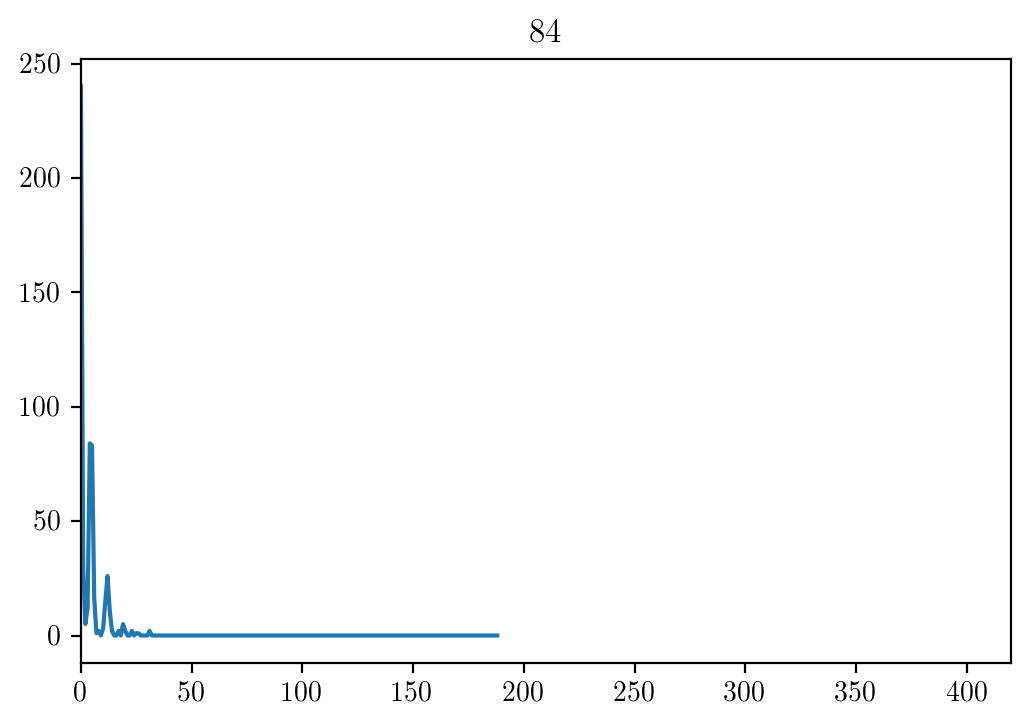

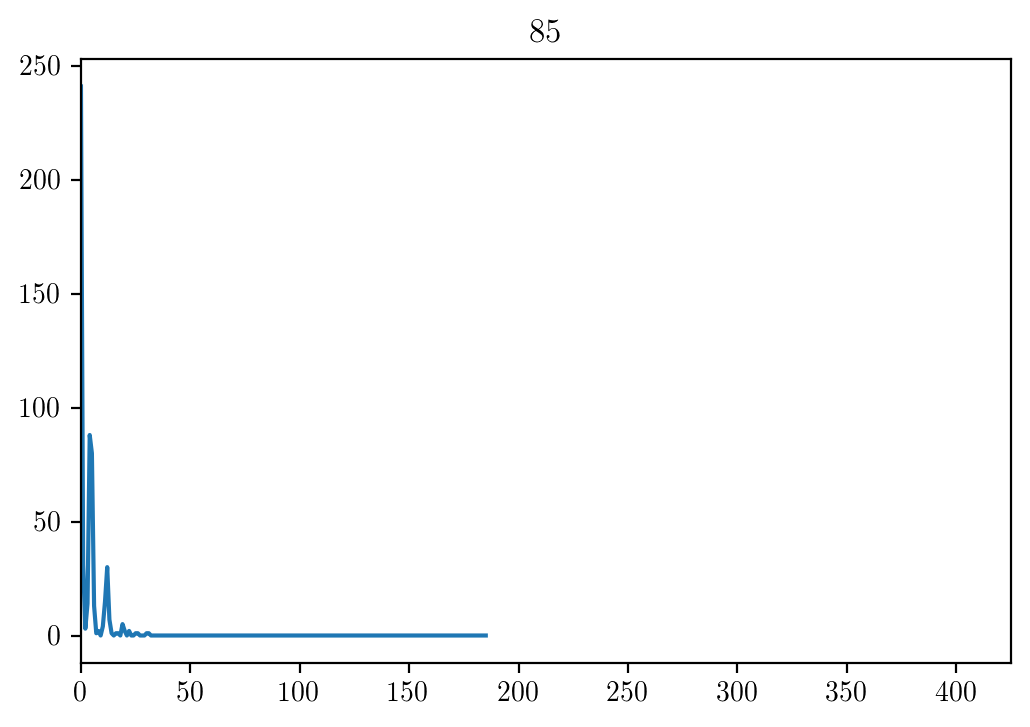

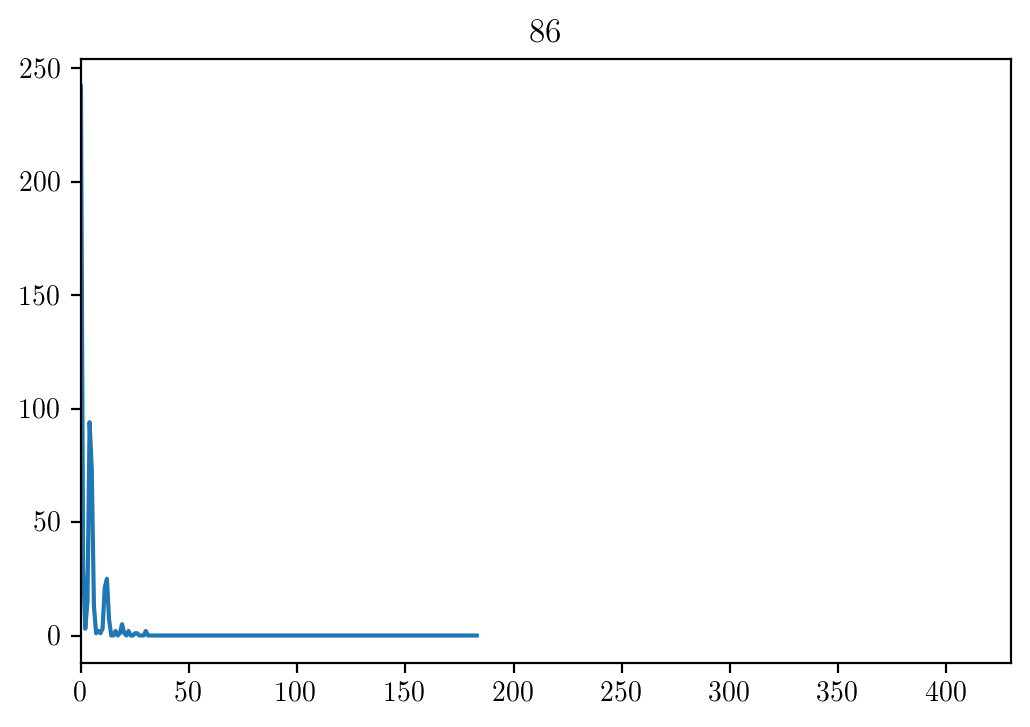

KeyboardInterrupt: 

In [2]:
# IMPORTS
import glob, os, sys
import numpy as np
sys.path.insert(0,'../../')
sys.path.insert(0,'/Library/TeX/texbin/')
sys.path.insert(0,'../../WaveformAnalysis')
sys.path.insert(0,'/home/tb829/project/purity-monitor/WaveformAnalysis/')
#from Gat import Gat
from Gat_HPC import Gat_HPC as Gat
#reload(Gat)
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

RATE_367 = r'/Users/tizi/Documents/YALE_WL.nosync/data/20220810/3.67kHz/'
RATE_05 = r'/Users/tizi/Documents/YALE_WL.nosync/data/20220810/4.0Vpp/0.5kHz/'
#50,6pks, dist 1
#NO_FIELD = r'/Users/tizi/Documents/YALE_WL.nosync/data/Avinay/NO_FIELD/'
# NO_FIELD_BINS = 9
# POS_FIELD = r'/Users/tizi/Documents/YALE_WL.nosync/data/Avinay/POS_FIELD/'
# POS_FIELD_BINS = 10
# NEG_FIELD = r'/Users/tizi/Documents/YALE_WL.nosync/data/Avinay/NEG_FIELD/'
# NEG_FIELD_BINS = 11

for volt in np.arange(30.0,34.00,0.2):
    gat = Gat(r'/gpfs/gibbs/project/david_moore/ab2935/Data/20220811/Fine_Binned_Vpp/5.0Vpp/0.5kHz/','mca_keith*',np.round(volt,2),debug=True,force=True,notify=False,data_type=Gat.MCA)
    NO_FIELD_calib_pe,NO_FIELD_calib_count,NO_FIELD_gain_list,NO_FIELD_gain_err = gat.eval_gain(total_bins=9,min=6,find_best=True,min_bin=45,max_bin=100,min_distance=2,max_distance=30,min_prominence=10,max_prominence=1000)
sys.exit()

gat2 = Gat(POS_FIELD,'mca_keith*',31.00,debug=True,force=True,notify=False,data_type=Gat.MCA)
POS_FIELD_calib_pe,POS_FIELD_calib_count,POS_FIELD_gain_list,POS_FIELD_gain_err = gat2.eval_gain(31.00,total_bins=POS_FIELD_BINS,min=4) #LEARN TO HANDLE MISSING PARAMS

gat3 = Gat(NEG_FIELD,'mca_keith*',31.00,debug=True,force=True,notify=False,data_type=Gat.MCA)
NEG_FIELD_calib_pe,NEG_FIELD_calib_count,NEG_FIELD_gain_list,NEG_FIELD_gain_err = gat3.eval_gain(31.00,total_bins=NEG_FIELD_BINS,min=4) #LEARN TO HANDLE MISSING PARAMS

# DATA SOURCE
#path = r'/home/tb829/sipm_data/202206[0-1]*/'
#path = r'/Users/tizi/Documents/YALE_WL.nosync/data/202206[0-1]*/'s

#gat = Gat(path, 'wave*',6.0,debug=True,notify=False)

In [ ]:
NO_FIELD_gain_list = np.asarray(NO_FIELD_gain_list)
NEG_FIELD_gain_list = np.asarray(NEG_FIELD_gain_list)
POS_FIELD_gain_list = np.asarray(POS_FIELD_gain_list)
NO_FIELD_gain_err = np.asarray(NO_FIELD_gain_err)
NEG_FIELD_gain_err = np.asarray(NEG_FIELD_gain_err)
POS_FIELD_gain_err = np.asarray(POS_FIELD_gain_err)
NO_FIELD_calib_pe = np.asarray(NO_FIELD_calib_pe)
NEG_FIELD_calib_pe = np.asarray(NEG_FIELD_calib_pe)
POS_FIELD_calib_pe = np.asarray(POS_FIELD_calib_pe)
NO_FIELD_calib_count = np.asarray(NO_FIELD_calib_count)
NEG_FIELD_calib_count = np.asarray(NEG_FIELD_calib_count)
POS_FIELD_calib_count = np.asarray(POS_FIELD_calib_count)

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,4))
time_NO_FIELD=np.arange(0,len(NO_FIELD_gain_list))

plt.errorbar(time_NO_FIELD,NO_FIELD_gain_list*NO_FIELD_BINS,yerr=NO_FIELD_gain_err,fmt='o',ms=7,label='Uncalibrated Gain')
#plt.errorbar(time_NEG_FIELD,NEG_FIELD_pe_corrected_gain,yerr=NEG_FIELD_pe_corrected_gain_err,fmt='o',ms=7,label='PE Calibrated Gain')

plt.ylabel('[ADC or PE]/PE')
plt.xlabel('Time [minutes]')
plt.title('NO_FIELD')
plt.grid()
plt.legend(loc='best')
#plt.savefig('NO_FIELD_gain_comparison.pdf')
plt.show()


plt.figure(figsize=(6,4))
time_POS_FIELD=np.arange(0,len(POS_FIELD_gain_list))

plt.errorbar(time_POS_FIELD,POS_FIELD_gain_list*POS_FIELD_BINS,yerr=POS_FIELD_gain_err,fmt='o',ms=7,label='Uncalibrated Gain')
#plt.errorbar(time_POS_FIELD,POS_FIELD_pe_corrected_gain,yerr=POS_FIELD_pe_corrected_gain_err,fmt='o',ms=7,label='PE Calibrated Gain')

plt.ylabel('[ADC or PE]/PE')
plt.xlabel('Time [minutes]')
plt.title('POS_FIELD')
plt.grid()
plt.legend(loc='best')
#plt.savefig('POS_FIELD_gain_comparison.pdf')
plt.show()


plt.figure(figsize=(6,4))
time_NEG_FIELD=np.arange(0,len(NEG_FIELD_gain_list))

plt.errorbar(time_NEG_FIELD,NEG_FIELD_gain_list*NEG_FIELD_BINS,yerr=NEG_FIELD_gain_err,fmt='o',ms=7,label='Uncalibrated Gain')
#plt.errorbar(time_NEG_FIELD,NEG_FIELD_pe_corrected_gain,yerr=NEG_FIELD_pe_corrected_gain_err,fmt='o',ms=7,label='PE Calibrated Gain')

plt.ylabel('[ADC or PE]/PE')
plt.xlabel('Time [minutes]')
plt.title('NEG_FIELD')
plt.grid()
plt.legend(loc='best')
#plt.savefig('NEG_FIELD_gain_comparison.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(5,4))
plt.errorbar(1,np.mean(NO_FIELD_gain_list*9),yerr=np.std(NO_FIELD_gain_list*NO_FIELD_BINS),label='NO FIELD',fmt='o')
plt.errorbar(5,np.mean(POS_FIELD_gain_list*10),yerr=np.std(POS_FIELD_gain_list*POS_FIELD_BINS),label='POS FIELD',fmt='o')
plt.errorbar(10,np.mean(NEG_FIELD_gain_list*11),yerr=np.std(NEG_FIELD_gain_list*NEG_FIELD_BINS),label='NEG FIELD',fmt='o')
plt.legend(loc='best')
plt.xlim(0,12)
plt.xlabel('')
plt.ylabel('Gain[ADC/PE]')
plt.grid()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
#plt.savefig('gain_comparison.pdf')
plt.show()

print((np.mean(POS_FIELD_gain_list*POS_FIELD_BINS)-np.mean(NO_FIELD_gain_list*NO_FIELD_BINS))/(np.mean(NO_FIELD_gain_list*NO_FIELD_BINS))*100,'%')
print((np.mean(NEG_FIELD_gain_list*NEG_FIELD_BINS)-np.mean(NO_FIELD_gain_list*NO_FIELD_BINS))/(np.mean(NO_FIELD_gain_list*NO_FIELD_BINS))*100,'%')

In [ ]:
frac_POS=(np.mean(POS_FIELD_gain_list*POS_FIELD_BINS)/np.mean(NO_FIELD_gain_list*NO_FIELD_BINS))
frac_NEG=(np.mean(NEG_FIELD_gain_list*NEG_FIELD_BINS)/np.mean(NO_FIELD_gain_list*NO_FIELD_BINS))

In [ ]:
def gauss(x,a,mu,sigma):
    return (a*np.exp(-0.5*((x-mu)/sigma)**2))

In [ ]:
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

correction_factor=0.99

avg_NO_FIELD=0
avg_POS_FIELD=0
avg_NEG_FIELD=0
n_bins=1


#--------- NO_FIELD  ------------
for i in range(len(NO_FIELD_calib_pe)):
    x_NO_FIELD,y_NO_FIELD=Gat.rebin_center(None,NO_FIELD_calib_pe[i]*correction_factor,NO_FIELD_calib_count[i],n_bins)
    avg_NO_FIELD+=y_NO_FIELD
    
rate_NO_FIELD=avg_NO_FIELD/(60*len(time_NO_FIELD))
cut_NO_FIELD=np.where((x_NO_FIELD>40) & (x_NO_FIELD<100))
popt_NO_FIELD,pcov_NO_FIELD=curve_fit(gauss,x_NO_FIELD[cut_NO_FIELD],rate_NO_FIELD[cut_NO_FIELD],p0=[np.max(rate_NO_FIELD[cut_NO_FIELD]),65,80],maxfev=100000)

#--------- POS_FIELD  ------------

for i in range(len(POS_FIELD_calib_pe)):
    x_POS_FIELD,y_POS_FIELD=Gat.rebin_center(None,POS_FIELD_calib_pe[i]*correction_factor,POS_FIELD_calib_count[i],n_bins)
    avg_POS_FIELD+=y_POS_FIELD
    
rate_POS_FIELD=avg_POS_FIELD/(60*len(time_POS_FIELD))
cut_POS_FIELD=np.where((x_POS_FIELD>25) & (x_POS_FIELD<70))
cut_POS_FIELD_frac=np.where((x_POS_FIELD>25*frac_POS) & (x_POS_FIELD<70*frac_POS))
popt_POS_FIELD,pcov_POS_FIELD=curve_fit(gauss,x_POS_FIELD[cut_POS_FIELD],rate_POS_FIELD[cut_POS_FIELD],p0=[np.max(rate_POS_FIELD[cut_POS_FIELD]),65,80],maxfev=100000)
popt_POS_FIELD_frac,pcov_POS_FIELD_frac=curve_fit(gauss,x_POS_FIELD[cut_POS_FIELD_frac],rate_POS_FIELD[cut_POS_FIELD_frac],p0=[np.max(rate_POS_FIELD[cut_POS_FIELD_frac]),65**frac_POS,80],maxfev=100000)


#--------- NEG_FIELD  ------------

for i in range(len(NEG_FIELD_calib_pe)):
    x_NEG_FIELD,y_NEG_FIELD=Gat.rebin_center(None,NEG_FIELD_calib_pe[i]*correction_factor,NEG_FIELD_calib_count[i],n_bins)
    avg_NEG_FIELD+=y_NEG_FIELD
    
rate_NEG_FIELD=avg_NEG_FIELD/(60*len(time_NEG_FIELD))
cut_NEG_FIELD=np.where((x_NEG_FIELD>25) & (x_NEG_FIELD<70))
popt_NEG_FIELD,pcov_NEG_FIELD=curve_fit(gauss,x_NEG_FIELD[cut_NEG_FIELD],rate_NEG_FIELD[cut_NEG_FIELD],p0=[np.max(rate_NEG_FIELD[cut_NEG_FIELD]),65,80],maxfev=100000)
cut_NEG_FIELD_frac=np.where((x_NEG_FIELD>25*frac_NEG) & (x_NEG_FIELD<70*frac_NEG))
popt_NEG_FIELD_frac,pcov_NEG_FIELD_frac=curve_fit(gauss,x_NEG_FIELD[cut_NEG_FIELD_frac],
                                                  rate_NEG_FIELD[cut_NEG_FIELD_frac],
                                                  p0=[np.max(rate_NEG_FIELD[cut_NEG_FIELD_frac]),65**frac_NEG,80]
                                                  ,maxfev=100000)

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
mpl.rcParams['figure.dpi']= 200

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(x_NO_FIELD,rate_NO_FIELD,lw=3,label='No E Field')
plt.plot(x_POS_FIELD,rate_POS_FIELD,lw=3,label='Pos E Field')
plt.plot(x_NEG_FIELD,rate_NEG_FIELD,lw=3,label='Neg E Field')
plt.xlabel('PE [Normalized to self]')
plt.ylabel('Rate [Hz]')

N_peaks=10


#--------- NO_FIELD  ------------

PROMINENCE_NO_FIELD=1E3 #This prominence is re-set here to ensure that every file starts out with a high prominence
    
peaks_NO_FIELD,pdict_NO_FIELD=find_peaks(rate_NO_FIELD,prominence=PROMINENCE_NO_FIELD)
peak_length_NO_FIELD=len(peaks_NO_FIELD)
    
#     We want to ensure that using a high prominence gives us at least N_peaks peaks to fit a straight line to. If it doesn't we reduce prominence till we get at least 3 peaks. N_peaks is set above
while (peak_length_NO_FIELD<N_peaks+1):
    PROMINENCE_NO_FIELD=PROMINENCE_NO_FIELD-1
            
    peaks_NO_FIELD,pdict_NO_FIELD=find_peaks(rate_NO_FIELD,prominence=PROMINENCE_NO_FIELD)
    peak_length_NO_FIELD=len(peaks_NO_FIELD)
# plt.plot(x_NO_FIELD[peaks_NO_FIELD],rate_NO_FIELD[peaks_NO_FIELD],'*',ms=7) # plot the peak markers



#--------- POS_FIELD  ------------

PROMINENCE_POS_FIELD=1E3 #This prominence is re-set here to ensure that every file starts out with a high prominence
    
peaks_POS_FIELD,pdict_POS_FIELD=find_peaks(rate_POS_FIELD,prominence=PROMINENCE_POS_FIELD)
peak_length_POS_FIELD=len(peaks_POS_FIELD)
    
#     We want to ensure that using a high prominence gives us at least N_peaks peaks to fit a straight line to. If it doesn't we reduce prominence till we get at least 3 peaks. N_peaks is set above
while (peak_length_POS_FIELD<N_peaks+1):
    PROMINENCE_POS_FIELD=PROMINENCE_POS_FIELD-1
            
    peaks_POS_FIELD,pdict_POS_FIELD=find_peaks(rate_POS_FIELD,prominence=PROMINENCE_POS_FIELD)
    peak_length_POS_FIELD=len(peaks_POS_FIELD)
# plt.plot(x_POS_FIELD[peaks_POS_FIELD],rate_POS_FIELD[peaks_POS_FIELD],'*',ms=7) # plot the peak markers


#--------- NEG_FIELD  ------------


PROMINENCE_NEG_FIELD=1E3 #This prominence is re-set here to ensure that every file starts out with a high prominence
    
peaks_NEG_FIELD,pdict_NEG_FIELD=find_peaks(rate_NEG_FIELD,prominence=PROMINENCE_NEG_FIELD)
peak_length_NEG_FIELD=len(peaks_NEG_FIELD)
    
#     We want to ensure that using a high prominence gives us at least N_peaks peaks to fit a straight line to. If it doesn't we reduce prominence till we get at least 3 peaks. N_peaks is set above
while (peak_length_NEG_FIELD<N_peaks+1):
    PROMINENCE_NEG_FIELD=PROMINENCE_NEG_FIELD-1
            
    peaks_NEG_FIELD,pdict_NEG_FIELD=find_peaks(rate_NEG_FIELD,prominence=PROMINENCE_NEG_FIELD)
    peak_length_NEG_FIELD=len(peaks_NEG_FIELD)
# plt.plot(x_NEG_FIELD[peaks_NEG_FIELD],rate_NEG_FIELD[peaks_NEG_FIELD],'*',ms=7) # plot the peak markers




plt.grid()
plt.xlim(0,15)
plt.ylim(0.2,1E3)
plt.yscale('log')
plt.legend(loc='best')


plt.subplot(2,2,2)
plt.plot(x_NO_FIELD,rate_NO_FIELD,color=colors[0],label='No E Field')
plt.plot(x_NO_FIELD[cut_NO_FIELD],gauss(x_NO_FIELD[cut_NO_FIELD],*popt_NO_FIELD),'m-.',lw=5,label="$\mu$: "+str(np.round(popt_NO_FIELD[1],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_NO_FIELD)[1]),2)))


plt.plot(x_POS_FIELD,rate_POS_FIELD,color=colors[1],label='Pos E Field')
plt.plot(x_POS_FIELD[cut_POS_FIELD],gauss(x_POS_FIELD[cut_POS_FIELD],*popt_POS_FIELD),'k-.',lw=5,label="$\mu$: "+str(np.round(popt_POS_FIELD[1],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_POS_FIELD)[1]),2)))


plt.plot(x_NEG_FIELD,rate_NEG_FIELD,color=colors[2],label='Neg E Field')
plt.plot(x_NEG_FIELD[cut_NEG_FIELD],gauss(x_NEG_FIELD[cut_NEG_FIELD],*popt_NEG_FIELD),'r-.',lw=5,label="$\mu$: "+str(np.round(popt_NEG_FIELD[1],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_NEG_FIELD)[1]),2)))

plt.xlim(10,150)
plt.ylim(0,0.3)
plt.legend(loc='best')
plt.grid()
plt.xlabel('PE [Normalized to self]')
plt.ylabel('Rate [Hz]')

plt.subplot(2,2,3)
plt.plot(x_NO_FIELD,rate_NO_FIELD,lw=3,label='No E Field')
plt.plot(x_POS_FIELD*frac_POS,rate_POS_FIELD,lw=3,label='Pos E Field')
plt.plot(x_NEG_FIELD*frac_NEG,rate_NEG_FIELD,lw=3,label='Neg E Field')
plt.grid()
plt.xlim(0,15)
plt.ylim(0.2,1E3)
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel('PE [Normalized to E=0 V/cm]')
plt.ylabel('Rate [Hz]/'+str(np.round(x_NO_FIELD[1]-x_NO_FIELD[0],1))+'PE')

plt.subplot(2,2,4)
plt.plot(x_NO_FIELD,rate_NO_FIELD,color=colors[0],label='No E Field')
plt.plot(x_NO_FIELD[cut_NO_FIELD],gauss(x_NO_FIELD[cut_NO_FIELD],*popt_NO_FIELD),'m-.',lw=5,label="$\mu$: "+str(np.round(popt_NO_FIELD[1],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_NO_FIELD)[1]),2)))


plt.plot(x_POS_FIELD*frac_POS,rate_POS_FIELD,color=colors[1],label='Pos E Field')
plt.plot(x_POS_FIELD[cut_POS_FIELD_frac]*frac_POS,gauss(x_POS_FIELD[cut_POS_FIELD_frac],*popt_POS_FIELD_frac),'k-.',lw=5,label="$\mu$: "+str(np.round(popt_POS_FIELD_frac[1],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_POS_FIELD_frac)[1]),2)))


plt.plot(x_NEG_FIELD*frac_NEG,rate_NEG_FIELD,color=colors[2],label='Neg E Field')
plt.plot(x_NEG_FIELD[cut_NEG_FIELD_frac]*frac_NEG,gauss(x_NEG_FIELD[cut_NEG_FIELD_frac],*popt_NEG_FIELD_frac),'r-.',lw=5,label="$\mu$: "+str(np.round(popt_NEG_FIELD_frac[1],2))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_NEG_FIELD_frac)[1]),2)))




plt.xlim(10,150)
plt.ylim(0,0.3)
# plt.yscale('log')
plt.legend(loc='best')
plt.grid()
plt.xlabel('PE [Normalized to E=0 V/cm]')
plt.ylabel('Rate [Hz]/'+str(np.round(x_NO_FIELD[1]-x_NO_FIELD[0],1))+'PE')
plt.tight_layout()

#plt.savefig('Source_PDE.pdf')
plt.show()

print(x_NO_FIELD[1]-x_NO_FIELD[0],x_POS_FIELD[1]-x_POS_FIELD[0],x_NEG_FIELD[1]-x_NEG_FIELD[0])

In [ ]:
sys.exit()
print(len(gat.SiPM.Ch[0].Time))

time = gat.SiPM.Ch[0].Time
wave = gat.SiPM.Ch[0].Amp[0]

from matplotlib import pyplot as plt

peak_x_ind = np.argmax(wave)
peak_A = wave[peak_x_ind]
peak_x = time[peak_x_ind]
fall_value = (peak_A)*(np.e**-1)
tau_ind = np.where(wave[peak_x_ind:] < fall_value)[0][0]
tau_est = np.abs(time[tau_ind] - time[peak_x_ind])
value_at = wave[peak_x_ind+tau_ind]
tau_est = time[tau_ind]
tau_ind_est = int(np.abs(peak_x_ind-tau_ind)/(1/(gat.SiPM.sampling_freq/1000000)))

plt.plot(time,wave)
plt.xlim(180,400)
plt.show()
print()

In [ ]:
NO_FIELD = r'/Users/tizi/Documents/YALE_WL.nosync/data/Avinay/NO_FIELD/'
POS_FIELD = r'/Users/tizi/Documents/YALE_WL.nosync/data/Avinay/POS_FIELD/'
NEG_FIELD = r'/Users/tizi/Documents/YALE_WL.nosync/data/Avinay/NEG_FIELD/'

#gat = Gat(NO_FIELD,'mca_keith',31.00,debug=False,force=True,notify=False,data_type=Gat.MCA)

In [ ]:
#gat.eval_gain(31.00,total_bins=9,min=4)

In [ ]:
#gat.mca_gain_corrected()

In [ ]:
gat2 = Gat(path, 'wave*',7,debug=False,notify=False)

In [ ]:
gat2.eval_waveform_func_fit()
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
gat2.eval_gain(5.00,plot=False,find_best=True,fix_params=True)

In [ ]:
gat2.plot(hist=True)
gat2.plot(hist=True,gain=False,hist_fit=True)
gat2.plot(hist=True,gain=True,hist_fit=True)
gat2.plot(hist=True,gain=True,hist_fit=False)
gat2.plot(gain=True)

In [ ]:
print(1/gat2.SiPM.sampling_freq)
/print(gat2.SiPM.Ch[0].Time[1]-gat.SiPMs[5.00].Ch[0].Time[0]) #TIME IN MICROSECONDS IF USING .TIME